# Persistance models & R2 measure + window search version etc  


In [55]:
# import  module containing all my functions 
import mscprojectcoding.FM_MScProject_LoadForecasting_Module as FMmodule


In [56]:
# force reimport of module after edits/updates to functions in PyCharm 
import importlib
importlib.reload(FMmodule)

<module 'mscprojectcoding.FM_MScProject_LoadForecasting_Module' from 'c:\\users\\fmurphy\\onedrive - loughborough university\\fm-project\\mscprojectcoding\\src\\mscprojectcoding\\FM_MScProject_LoadForecasting_Module.py'>

In [57]:
#import functions..lots that are not needed.

from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  annPlot                    # plots ANN model forecast for specified windows 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  annPlotInputs              # shift train&test forecasts to align with hr/day indices ie unpack into actual time bands - similar to shiftInputs but returns dictionary of np arreays for test AND train wondows
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_MLP                 # create MLP for ANN
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_TrainPredictSeries  # split Train and Test numpy arrays for MLR 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_TrainPredict_df     # split Train and Test data into dfs for ANN - standard version
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_TrainPredict_df_V2  # split Train and Test data into dfs for ANN - version with day of week classifier scaling
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  create_save_folder         # create folder name for saving results
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  cv_calc                    # Error calculation - coeff of variance error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  findkeys                   # get all keys and subkeys of nested dictionary 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  flip_dictionary            # invert dictionary nest levels for plotting results (MLR and/or ANN)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  fullprint                  #change num lines to print of a numpy array without changing default
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_NPminmax_values        # get max value in each col OR full np array
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_NaN_stats              # get stats for NaNs in each column
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_TrainTestSeries        # for ANN inputs ?
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_data_range
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_errors                 # compute errors for supplied models, hardwired for MAPE,MAE,CV,RMSE,NRMSE errors
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_limits                 # get x,y limits for plot axis
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_save_folderName        # generate folder name for saving results files
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_uniques                # get unique values from dataframe columns or pd.series?
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_error_percentiles      # get specified percentiles from error dictionary (MLR, ANN)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_errorDictionary        # load error dictionary from disk given path name
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  get_MLRerrorDictionary     # load MLR error dictionary from disk given path name 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  getTrainTestSeriesNames    # generate list of train, test series names from eg loadSeries, envSeries dictionaries
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  historyPlot                # plots loss function from ANN MLP history object
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  lrmodel_r2                 # 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  mae_calc                   # Error calculation - mean avg error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  mape_calc                  # Error calculation - Mean avg percentage error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  mlr_predict                # returns forecast given MLR regression model
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  mlr_train                  # returns MLR regression model 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  merge_TrainTestErrors      # for ANN??
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  nrmse_calc                 # Error calculation - normalised root mean square error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  peristModelPlot            # plot persistence model series
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  persistDataArrayVersion2   # # Splice out a) xs series b) ys series from load data series (aggregate or uID) and create 2 row
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  persistDataWindowed        # generates persistence models with variable window size search
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  persistScatterPlot         # plot peristance models 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  piecewise_linear           # comput piecewise linear function given slopes, intercept etc
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plotSectionOfLoadProf      # redundant? used in MLR scripts
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plot_allFeatures           # plot selected columns of numpy array 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plot_errors                # plot avg errors from errors dictionary (eg for all MLR models)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plot_forecast              # plot forecast for specified tiime periods (MLR only?)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  plot_percentileTraces      # plot percentile traces extracted from percentile dictionaries created from e.g. ANN and MLR errro dictionaries
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  pltDefaults                # set rc params (matplotlib) plot defaults
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  populate_AllFeatures       # populate numpy array for MLR 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  r2_get                     # persistence model r2 calculations
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  r2_histogram               # plotting of r2 histogram for variable window search persistence model 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  r2_histogramV2             # similar but tailored for publication plots (most series greyed out)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  r2RegPlot                  # add R2 regression fit line to existing subplot
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  randomUserGroupAggregate   # form group aggregate load df for random userD grps created by randomUserGroups
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  randomUserGroups           # form random userID clusters of size N  
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  removeNestings
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  rmse_calc                  # Error calculation - root mean sq error
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  round_down                 # round a number down to nearest decade (0.1,1,10,100 etc) 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  round_up                   # round a number up to nearest decade (0.1,1,10,100 etc)
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  sbn_plotErrors             # plot MLR,ANN model errors as boxplot, swarm plot - V1 : plot for various error types - ordered by error type , not model type
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  sbn_plotErrors_V2          # plot MLR,ANN model errors as boxplot, swarm plot - V2 : Version 2 :plots one error type with subplot for each model
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  sbn_ErrorsAllModels        # multi-model boxplot of errorors in one plot
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  set_dowSeries              # set day of week classifier channels given a dayOfWeek classifier list
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  set_envSeries              # set environment series to be used in MLR and/or ANN 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  set_loadSeries             # select which load series to use in MLR and/or ANN 
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  shiftInputs                # shift models/forecast series to align with hr/day indices of load ie unpack into actual time bands
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  show_mem_usage             # shows total memory usage
from mscprojectcoding.FM_MScProject_LoadForecasting_Module import  stackplot_of_forecast      # plots time window of all passed model forecasts,loads - load profiles stacked by calendar day


In [4]:
# get list of all functions in module
#dir(FMmodule)

In [5]:
# import standard packages /modules etc : may not need all these..

import matplotlib as mpl

import matplotlib.pyplot as plt     # pyplot = collection of command style functions that make matplotlib work like MATLAB, uses numpy arrays internally
import matplotlib.colors as colors2  # module for converting numbers or color arguments to RGB or RGBA
import matplotlib.cm as cmx         # built-in colour maps and utilities; Any colormap can be reversed by appending '_r', so 'RdYlGn_r' is the reversed Red-Yellow-Green colormap
import matplotlib.mlab as mlab      # matlab compatible cmd names
import matplotlib.ticker as mtick   # configurable tick locating and formatting, used by Axis class
import matplotlib.dates as mdates    # useful for getting tick label as siimple dates

import matplotlib.patches as mpatches  # draw geometric shapes 
from matplotlib.patches import Rectangle
import matplotlib.lines as mlines      # 2D lines
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator,MaxNLocator,PercentFormatter) # needed for eg integer tick marks etc

import seaborn as sns                  # data visualization library based on matplotlib             

%matplotlib inline

import math                            # module provides access to the mathematical functions defined by the C standard
import csv
import sys
import pandas as pd
import numpy as np
import time                 
import re                              # provides regular expression matching operations 
import random
import os

from six.moves import cPickle as pickle   # cPickle is faster as written in C but merged with Pickle in Python 3.x ..

import numpy.polynomial.polynomial as poly  # polynomial functions incl fitting , etc

from sklearn.cluster import KMeans    # Sklearn = SciPy ML toolkit 
from sklearn import linear_model            # Estimated coefficients for linear regression
#from sklearn.model_selection import train_test_split 
#from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from scipy.interpolate import interp1d      # Interpolate a 1-D function.
from scipy.spatial.distance import cdist, pdist       # Pairwise distances between observations in n-dimensional space.
from scipy.spatial.distance import squareform         # Convert a vector-form distance vector to a square-form distance matrix, and vice-versa
from scipy.cluster.hierarchy import dendrogram, linkage   # hierarchical/agglomerative clustering 
from scipy.cluster.hierarchy import fcluster              # Form flat clusters from the hierarchical clustering
from scipy import stats                                   # statistical functions https://docs.scipy.org/doc/scipy/reference/stats.html
from scipy import optimize             # commonly used optimization algorithms eg least squares minimization, curve fitting , etc
from statistics import mean

import json
from datetime import datetime, timedelta 

from itertools import chain           # for iterating through list (of lists) of dictionaries etc
from pathlib import Path              # file/folder paths etc

import requests                              # url requests
from plot_keras_history import plot_history

import importlib  # import other module eg my package

In [6]:
# Gete load data
hourly_df=pd.read_pickle('../project_data/intermediateDataLCL/LCL_hourly_df.pkl')
hourly_df


2013-01-01 00:00:00  2013-01-01 01:00:00  2013-01-01 02:00:00  \
user_id                                                                  
2                      0.460                0.426                0.411   
10                     0.962                1.121                0.373   
18                     0.378                0.277                0.257   
19                     0.282                0.185                0.177   
27                     0.458                0.594                0.450   
...                      ...                  ...                  ...   
5526                   0.398                0.284                0.270   
5527                   0.258                0.221                0.070   
5530                   0.624                0.150                0.125   
5539                   0.939                0.619                0.402   
5540                   0.091                0.131                0.093   

         2013-01-01 03:00:00  2013-01-01 04:00:00  2013-01-01 05:00:00  \
user_id                                                                  
2                      0.395                0.221                0.206   
10                     0.421                0.303                0.450   
18                     0.257                0.414                0.751   
19                     0.137                0.081                0.152   
27                     0.325                0.247                0.271   
...                      ...                  ...                  ...   
5526                   0.281                0.251                0.296   
5527                   0.168                0.133                0.080   
5530                   0.124                0.116                0.129   
5539                   0.274                0.357                0.302   
5540                   0.097                0.122                0.088   

         2013-01-01 06:00:00  2013-01-01 07:00:00  2013-01-01 08:00:00  \
user_id                                                                  
2                      0.206                0.217                0.216   
10                     0.389                0.452                0.703   
18                     0.559                0.532                0.510   
19                     0.180                0.226                0.540   
27                     0.259                0.268                0.226   
...                      ...                  ...                  ...   
5526                   0.220                0.401                1.072   
5527                   0.074                0.073                0.090   
5530                   0.113                0.398                0.496   
5539                   0.390                0.436                0.534   
5540                   0.096                0.119                0.091   

         2013-01-01 09:00:00  2013-01-01 10:00:00  2013-01-01 11:00:00  \
user_id                                                                  
2                      0.216                0.200                0.242   
10                     0.512                0.754                2.117   
18                     0.338                0.252                0.265   
19                     0.434                0.366                0.352   
27                     0.215                0.374                0.368   
...                      ...                  ...                  ...   
5526                   0.485                0.361                0.272   
5527                   0.089                0.307                0.148   
5530                   0.832                0.224                0.200   
5539                   0.562                0.747                0.499   
5540                   0.177                0.145                0.085   

         2013-01-01 12:00:00  2013-01-01 13:00:00  2013-01-01 14:00:00  \
user_id                                                                  
2        

In [7]:
# user database cleaning - exclude anomalously low usage users (see LCL3)

cutoff = 1000  # see LCL3 histograms of annual aggregate consumption by user
lowLoadUsers_df = hourly_df.loc[(hourly_df.sum(axis=1).values < cutoff)]  
print("Number of users with annual aggregate usage < ",cutoff," kWh is : ",lowLoadUsers_df.shape[0])

agg_lowLoadUsers = lowLoadUsers_df.sum(axis=0)    # sum each column ie aggregate of all users in input df
uIDsReject = lowLoadUsers_df.index
uIDsAll = hourly_df.index.values   # get all userIDs

uIDs = [x for x in uIDsAll if x not in uIDsReject]
print("# users retained:",len(uIDs))
hourly_df = hourly_df.loc[uIDs]

aggregateLoad = hourly_df.sum(axis=0)    # sum each column ie aggregate of all users at each time 
aggregateLoad

Number of users with annual aggregate usage <  1000  kWh is :  11
# users retained: 711


2013-01-01 00:00:00    458.542
2013-01-01 01:00:00    379.255
2013-01-01 02:00:00    295.068
2013-01-01 03:00:00    252.970
2013-01-01 04:00:00    230.669
                        ...   
2013-12-31 19:00:00    637.441
2013-12-31 20:00:00    583.995
2013-12-31 21:00:00    517.485
2013-12-31 22:00:00    479.429
2013-12-31 23:00:00    427.385
Length: 8760, dtype: float64

In [8]:
# compute aggregate load series by hr
aggregateLoad = hourly_df.sum(axis=0)    # sum each column ie aggregate of all users at each time
aggregateLoad 

2013-01-01 00:00:00    458.542
2013-01-01 01:00:00    379.255
2013-01-01 02:00:00    295.068
2013-01-01 03:00:00    252.970
2013-01-01 04:00:00    230.669
                        ...   
2013-12-31 19:00:00    637.441
2013-12-31 20:00:00    583.995
2013-12-31 21:00:00    517.485
2013-12-31 22:00:00    479.429
2013-12-31 23:00:00    427.385
Length: 8760, dtype: float64

In [9]:
# compute aggregate load series by day

nDays=365
aggLoadDaily = pd.DataFrame(aggregateLoad.values.reshape(nDays,24)).sum(axis=1)
#print(type(aggLoadDaily))

colsD = pd.date_range(start='1/1/2013', end='1/1/2014', freq='1D')[0:-1]  
#print(type(colsD))
#colsD

# concat dates and agg load per day
aggLoadDaily_df=pd.concat([pd.DataFrame(colsD),aggLoadDaily],axis=1)
aggLoadDaily_df.columns=['date','AggLoadDaily']
aggLoadDaily_df = aggLoadDaily_df.set_index('date')
aggLoadDaily_df

AggLoadDaily
date                    
2013-01-01   9933.919997
2013-01-02   9921.871998
2013-01-03   9396.279000
2013-01-04   9411.108999
2013-01-05   9901.170000
...                  ...
2013-12-27  10035.419000
2013-12-28   9806.649000
2013-12-29  10123.249999
2013-12-30  10020.968998
2013-12-31   9941.396000

[365 rows x 1 columns]

 Prepare feature and target arrays xs,ys where      
xs = lagged (e.g. t-24) independent variable (feature)        
ys = 'unlagged' (e.g.) dependent variable (target)   


In [10]:
# generate xs,ys arrays  

lDataTtoF = persistDataArrayVersion2(aggregateLoad,smplsPerDay=24,nDays=365,dayClass=[1,2,3,4],lagD=1,refDay=0)
print(lDataTtoF.shape)
lDataStoM = persistDataArrayVersion2(aggregateLoad,smplsPerDay=24,nDays=365,dayClass=[5,6,0],lagD=1,refDay=0)
print(lDataStoM.shape)
lDataStoM_7d = persistDataArrayVersion2(aggregateLoad,smplsPerDay=24,nDays=365,dayClass=[5,6,0],lagD=7,refDay=7)
print(lDataStoM_7d.shape)

(2, 4968)
(2, 3744)
(2, 3672)


In [11]:
plt.rcParams.update({'figure.titlesize': 12}) 
plt.rcParams.update({'axes.titlesize':14}) 

In [18]:
# plot output of persistDataArrayVersion2 
#peristModelPlot(lDataTtoF,lDataStoM,lDataStoM_7d,supTitle='Persistance Models - Aggregate Data')

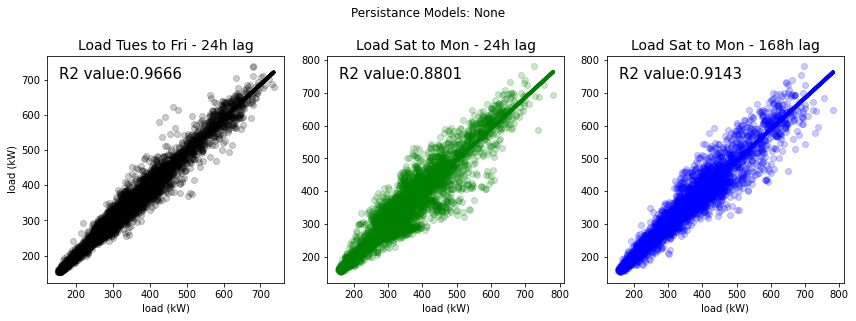

In [19]:
fig,ax1,ax2,ax3=peristModelPlot(lDataTtoF,lDataStoM,lDataStoM_7d,supTitle=None) #,uID=uID)
r2RegPlot(lDataTtoF[0], lDataTtoF[1], fig,ax1,'k')
r2RegPlot(lDataStoM[0], lDataStoM[1], fig,ax2,'g')
r2RegPlot(lDataStoM_7d[0], lDataStoM_7d[1], fig,ax3,'b')


inputs for regression and r2 calculation :     
1) feature (time lagged) np array e.g. t-24 hourly or daily load series    
2) 'target' (current time) np array e.g. t hourly or daily load series      
Run on a) Aggregate b) Individual users       


Coefficients:  [[0.96703543]]
Mean squared error:  440.7495283533095
Coefficient of determination:  0.9666129180817699
r2:  0.9666129180817699 mean sq error:  440.7495283533095


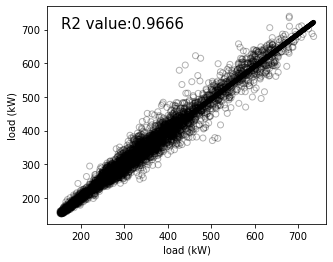

In [25]:
# this is just a test of method
# Get r2 for aggregate HOURLY load split by weekday, weekends etc and PLOT DATA

# assign independent var (features),xs and dependent var (target) ys
xs=lDataTtoF[0]
ys=lDataTtoF[1]
r2,mse,ys_pred = lrmodel_r2(xs,ys,plot='y',print='y',cl='k',inputFigObject='None')
print("r2: ",r2,"mean sq error: ",mse)


In [26]:
lDataTtoF[1]

array([426.4649999, 329.5700004, 258.8309995, 235.4319998, 226.0110001,
       227.6739997, 262.541    , 286.0779998, 345.5940004, 378.1239997,
       ..., 441.5919999, 474.1599998, 486.8469982, 582.6290004,
       595.819    , 611.2859999, 579.0329991, 538.4429998, 507.1300004,
       417.4179998])

In [32]:
# test for aggregate case for each DoW class
fig = plt.figure(figsize=(12,4))  # create empty fig object on which to append subplots

print("Aggregate Load T_to_F 24h persistance model R2: ",r2_get(lDataTtoF,plot='n',cl='k',inputFigObject=fig,subplotPos=1,subplotTitle='TtoF'))
#print("Aggregate Load S_to_M 24h persistance model R2: ",r2_get(lDataStoM,plot='y',cl='b',inputFigObject=fig,subplotPos=2,subplotTitle='StoM'))
#print("Aggregate Load S_to_M 168h persistance model R2: ",r2_get(lDataStoM_7d,plot='y',cl='g',inputFigObject=fig,subplotPos=3,subplotTitle='StoM 168h'))


Aggregate Load T_to_F 24h persistance model R2:  0.9666129180817699


<Figure size 864x288 with 0 Axes>

In [33]:
# now get r2 for individual users 

In [34]:
# first, get uID list
uIDs=hourly_df.index.values
len(uIDs)
print(type(uIDs[0]))
uIDs

<class 'numpy.int64'>


array([   2,   10,   18,   19,   27,   40,   49,   57,   60,   91,   99,
        100,  102,  111,  116,  117,  123,  131,  140,  145,  152,  162,
        179,  181,  228,  248,  255,  260,  267,  270,  277,  280,  281,
        295,  301,  306,  307,  312,  313,  314,  317,  320,  322,  323,
        330,  349,  350,  355,  357,  359,  363,  367,  373,  381,  396,
        397,  415,  443,  455,  462,  496,  498,  502,  506,  510,  547,
        566,  568,  572,  573,  578,  604,  612,  614,  618,  623,  632,
        634,  638,  644,  654,  663,  670,  676,  682,  685,  686,  689,
        692,  715,  727,  731,  732,  737,  742,  746,  750,  756,  773,
        784,  809,  827,  852,  855,  867,  872,  876,  888,  891,  899,
        903,  909,  952,  955,  956,  966,  968,  995, 1000, 1003, 1008,
       1021, 1029, 1032, 1060, 1072, 1081, 1088, 1112, 1114, 1128, 1130,
       1135, 1151, 1164, 1168, 1178, 1183, 1184, 1210, 1212, 1214, 1221,
       1227, 1233, 1236, 1241, 1244, 1250, 1253, 12

In [35]:
hourly_df

2013-01-01 00:00:00  2013-01-01 01:00:00  2013-01-01 02:00:00  \
user_id                                                                  
2                      0.460                0.426                0.411   
10                     0.962                1.121                0.373   
18                     0.378                0.277                0.257   
19                     0.282                0.185                0.177   
27                     0.458                0.594                0.450   
...                      ...                  ...                  ...   
5526                   0.398                0.284                0.270   
5527                   0.258                0.221                0.070   
5530                   0.624                0.150                0.125   
5539                   0.939                0.619                0.402   
5540                   0.091                0.131                0.093   

         2013-01-01 03:00:00  2013-01-01 04:00:00  2013-01-01 05:00:00  \
user_id                                                                  
2                      0.395                0.221                0.206   
10                     0.421                0.303                0.450   
18                     0.257                0.414                0.751   
19                     0.137                0.081                0.152   
27                     0.325                0.247                0.271   
...                      ...                  ...                  ...   
5526                   0.281                0.251                0.296   
5527                   0.168                0.133                0.080   
5530                   0.124                0.116                0.129   
5539                   0.274                0.357                0.302   
5540                   0.097                0.122                0.088   

         2013-01-01 06:00:00  2013-01-01 07:00:00  2013-01-01 08:00:00  \
user_id                                                                  
2                      0.206                0.217                0.216   
10                     0.389                0.452                0.703   
18                     0.559                0.532                0.510   
19                     0.180                0.226                0.540   
27                     0.259                0.268                0.226   
...                      ...                  ...                  ...   
5526                   0.220                0.401                1.072   
5527                   0.074                0.073                0.090   
5530                   0.113                0.398                0.496   
5539                   0.390                0.436                0.534   
5540                   0.096                0.119                0.091   

         2013-01-01 09:00:00  2013-01-01 10:00:00  2013-01-01 11:00:00  \
user_id                                                                  
2                      0.216                0.200                0.242   
10                     0.512                0.754                2.117   
18                     0.338                0.252                0.265   
19                     0.434                0.366                0.352   
27                     0.215                0.374                0.368   
...                      ...                  ...                  ...   
5526                   0.485                0.361                0.272   
5527                   0.089                0.307                0.148   
5530                   0.832                0.224                0.200   
5539                   0.562                0.747                0.499   
5540                   0.177                0.145                0.085   

         2013-01-01 12:00:00  2013-01-01 13:00:00  2013-01-01 14:00:00  \
user_id                                                                  
2        

In [36]:
#test
for uID in uIDs:
    #print(uID)
    uID_load  = hourly_df.loc[uID]   

In [37]:
# Loop thro uIDs and calc r2 for each uID :
# compute 3 r2 values for each uID: TtoF,StoM (t-24) model and StoM (t-168) model

r2List_TtoF=[]
r2List_StoM=[]
r2List_StoM_7d=[]

for uID in uIDs:
    uID_load  = hourly_df.loc[uID]      
    #print(type(uID_load))
    #print(uID_load.shape)
    #print(uID)

    lDataTtoF = persistDataArrayVersion2(uID_load,smplsPerDay=24,nDays=365,dayClass=[1,2,3,4],lagD=1,refDay=0)
    #print(lDataTtoF.shape)
    lDataStoM = persistDataArrayVersion2(uID_load,smplsPerDay=24,nDays=365,dayClass=[5,6,0],lagD=1,refDay=0)
    #print(lDataStoM.shape)
    lDataStoM_7d = persistDataArrayVersion2(uID_load,smplsPerDay=24,nDays=365,dayClass=[5,6,0],lagD=7,refDay=7)
    #print(lDataStoM_7d.shape)
    
    r2 = r2_get(lDataTtoF,plot='n',print='n',cl='k') 
    #print("r2 (TtoF data): ",r2,"mean sq error (TtoF data): ",mse)
    r2List_TtoF.append([r2])

    r2 = r2_get(lDataStoM,plot='n',print='n',cl='b')  
    #print("r2 (StoM data): ",r2,"mean sq error (StoM data): ",mse)
    r2List_StoM.append([r2])
    
    r2 = r2_get(lDataStoM_7d,plot='n',print='n',cl='b')  
    #print("r2 (StoM 7 day persistance data): ",r2,"mean sq error (StoM 7 day persistance data): ",mse)
    r2List_StoM_7d.append([r2])

#r2TtoF_df = pd.DataFrame(r2List_TtoF,columns=['meterID','r2'])
#r2StoM_df = pd.DataFrame(r2List_StoM,columns=['meterID','r2'])
#r2StoM7d_df = pd.DataFrame(r2List_StoM_7d,columns=['meterID','r2'])

# instead write all 3 r2 lists to a single dataFrame
r2uIDs_df=pd.DataFrame(np.column_stack([uIDs,r2List_TtoF,r2List_StoM,r2List_StoM_7d]),\
                       columns=['uID','r2_TtoF','r2_StoM','r2_StoM_7d'])
r2uIDs_df

uID   r2_TtoF   r2_StoM  r2_StoM_7d
0       2.0  0.253140  0.160399    0.097313
1      10.0  0.290429  0.234314    0.265800
2      18.0  0.066615  0.070400    0.016962
3      19.0  0.355158  0.151419    0.163640
4      27.0  0.180372  0.011887    0.107292
..      ...       ...       ...         ...
706  5526.0  0.177547  0.078406    0.135589
707  5527.0  0.335656  0.285877    0.256924
708  5530.0  0.278730  0.408710    0.425203
709  5539.0  0.123269  0.069258    0.086562
710  5540.0  0.091107  0.046541    0.032142

[711 rows x 4 columns]

In [38]:
r2uIDs_df['uID'] = r2uIDs_df['uID'].astype(int)
r2uIDs_df

uID   r2_TtoF   r2_StoM  r2_StoM_7d
0       2  0.253140  0.160399    0.097313
1      10  0.290429  0.234314    0.265800
2      18  0.066615  0.070400    0.016962
3      19  0.355158  0.151419    0.163640
4      27  0.180372  0.011887    0.107292
..    ...       ...       ...         ...
706  5526  0.177547  0.078406    0.135589
707  5527  0.335656  0.285877    0.256924
708  5530  0.278730  0.408710    0.425203
709  5539  0.123269  0.069258    0.086562
710  5540  0.091107  0.046541    0.032142

[711 rows x 4 columns]

In [39]:
# set index to uID
r2Vals = r2uIDs_df['r2_TtoF'].values
print(len(r2Vals),type(r2Vals))
print(r2Vals)

r2uIDs_df = r2uIDs_df.set_index('uID')
r2uIDs_df


711 <class 'numpy.ndarray'>
[0.25313986 0.29042913 0.06661539 0.35515805 0.18037174 0.05172049
 0.27283038 0.09342123 0.47930287 0.16403538 ... 0.27567778 0.15509668
 0.16099168 0.19747918 0.02032824 0.17754698 0.33565647 0.27873004
 0.12326884 0.09110693]


r2_TtoF   r2_StoM  r2_StoM_7d
uID                                 
2     0.253140  0.160399    0.097313
10    0.290429  0.234314    0.265800
18    0.066615  0.070400    0.016962
19    0.355158  0.151419    0.163640
27    0.180372  0.011887    0.107292
...        ...       ...         ...
5526  0.177547  0.078406    0.135589
5527  0.335656  0.285877    0.256924
5530  0.278730  0.408710    0.425203
5539  0.123269  0.069258    0.086562
5540  0.091107  0.046541    0.032142

[711 rows x 3 columns]

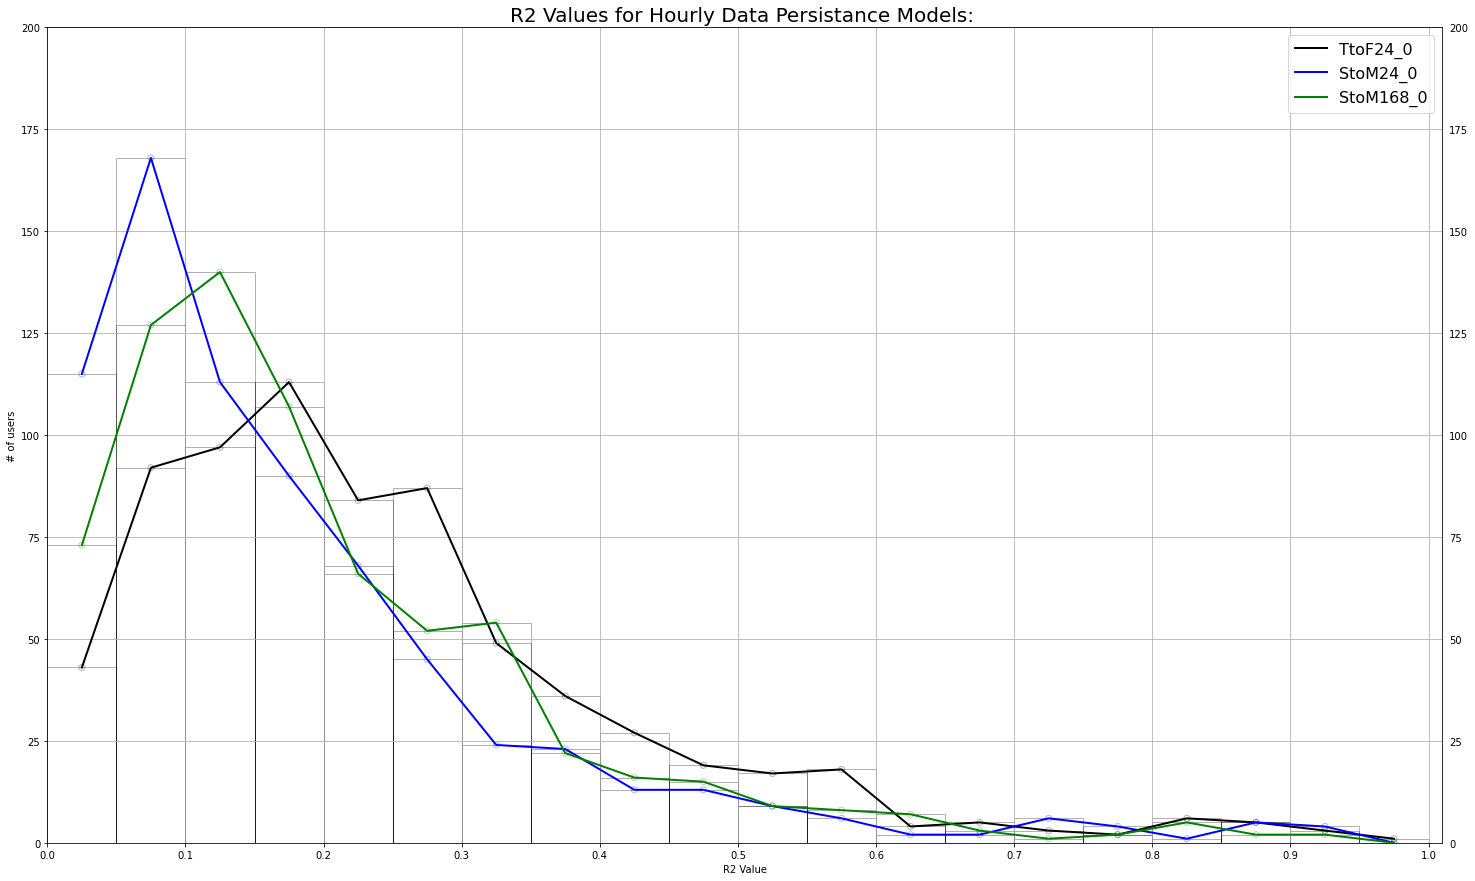

In [40]:
r2_histogram(r2uIDs_df,pltTitle='')

In [41]:
# Chose best r2 vals from TtoF (weekday) data 
r2_cutoff = 0.8
df = r2uIDs_df.loc[r2uIDs_df['r2_TtoF']>r2_cutoff]
df = df.sort_values(by='r2_TtoF', ascending=False)

#take the best 10 to plot
uIDs_best = df.head(10).index
print(len(uIDs_best))
print(uIDs_best)

10
Int64Index([4897, 5041, 5385, 4903, 415, 4902, 312, 4901, 4983, 5009], dtype='int64', name='uID')


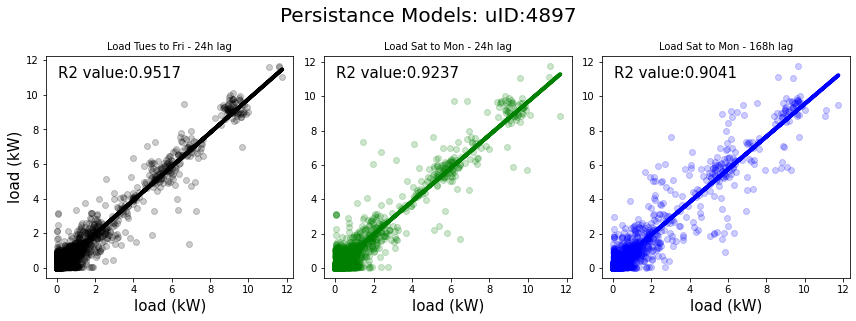

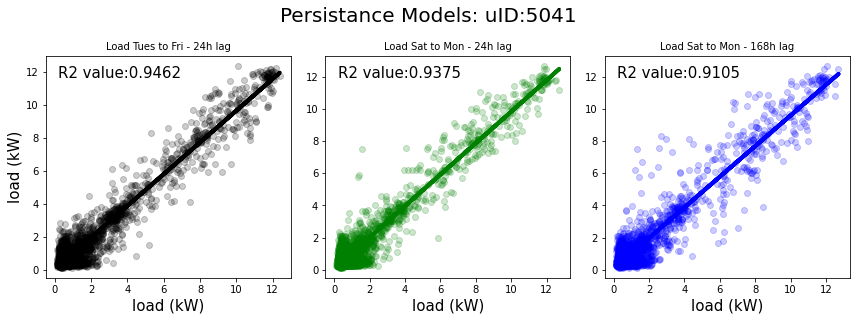

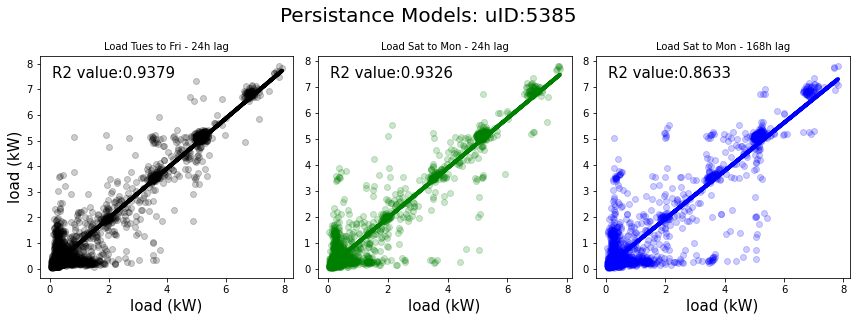

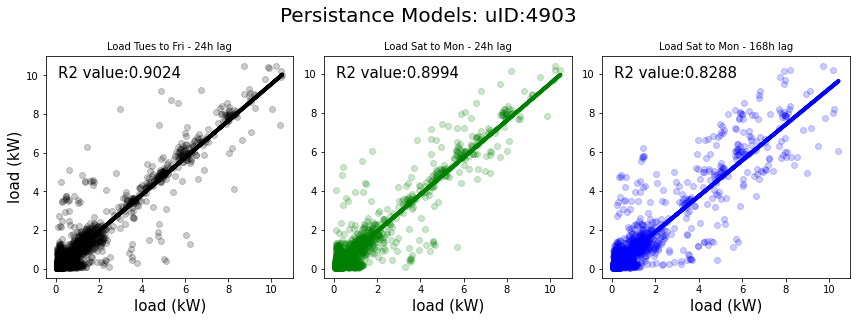

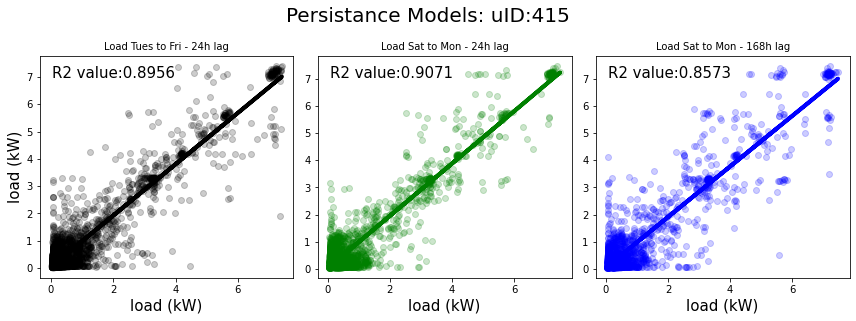

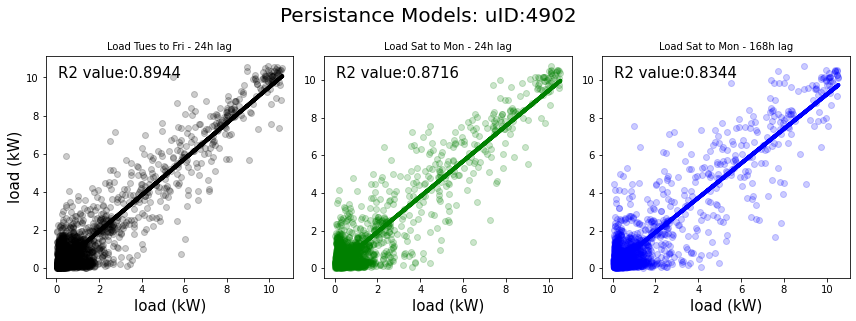

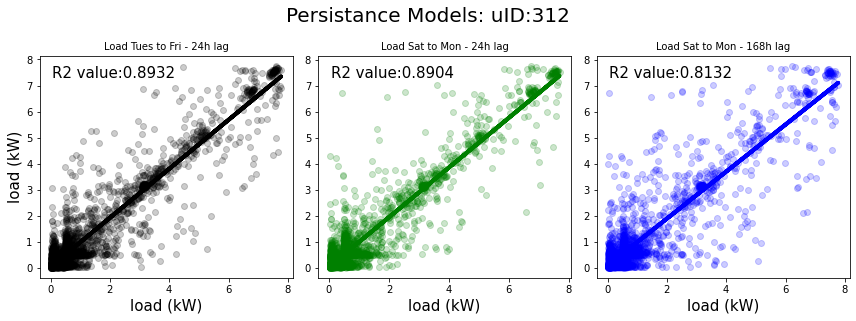

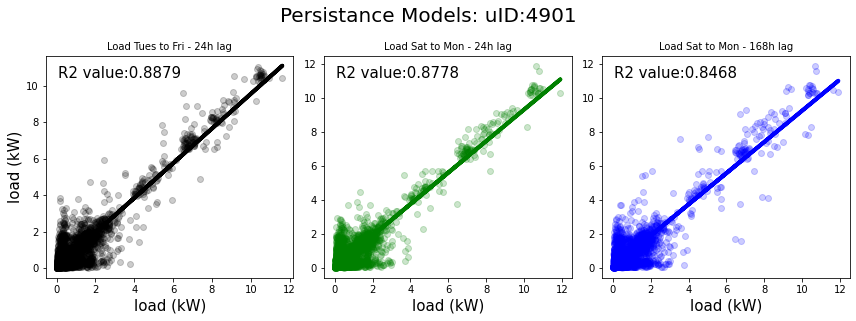

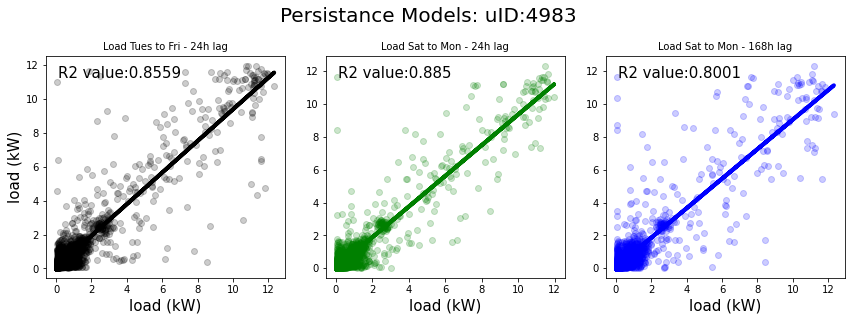

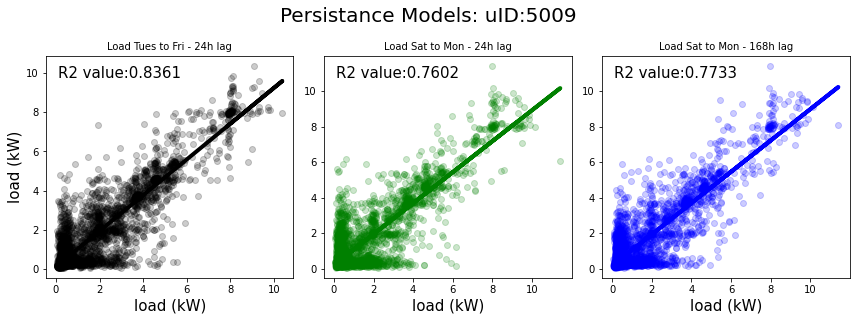

In [42]:
# Plot persistance models for the uIDs with best r2 values (TtoF data) selected above

for uID in uIDs_best:
    uID_load  = hourly_df.loc[uID]         
    #print(uID)
    
    lDataTtoF = persistDataArrayVersion2(uID_load,smplsPerDay=24,nDays=365,dayClass=[1,2,3,4],lagD=1,refDay=0)
    lDataStoM = persistDataArrayVersion2(uID_load,smplsPerDay=24,nDays=365,dayClass=[5,6,0],lagD=1,refDay=0)
    lDataStoM_7d = persistDataArrayVersion2(uID_load,smplsPerDay=24,nDays=365,dayClass=[5,6,0],lagD=7,refDay=7)  

    fig,ax1,ax2,ax3=peristModelPlot(lDataTtoF,lDataStoM,lDataStoM_7d,supTitle='uID',uID=uID)
    r2RegPlot(lDataTtoF[0], lDataTtoF[1], fig,ax1,'k')
    r2RegPlot(lDataStoM[0], lDataStoM[1], fig,ax2,'g')
    r2RegPlot(lDataStoM_7d[0], lDataStoM_7d[1], fig,ax3,'b')

   


In [43]:
# Chose some v poor examples for illustration
r2_cutoff = 0.1
df = r2uIDs_df.loc[r2uIDs_df['r2_TtoF']<r2_cutoff]
df = df.sort_values(by='r2_TtoF', ascending=True)

#take the worst 3 to plot
uIDs_worst = df.head(3).index
print(len(uIDs_worst))
print(uIDs_worst)

3
Int64Index([355, 5328, 3894], dtype='int64', name='uID')


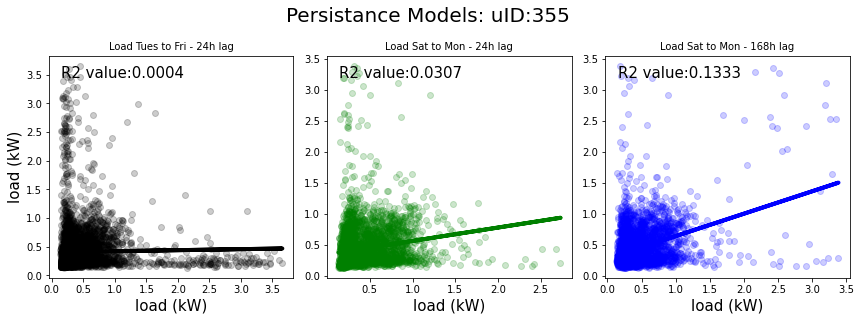

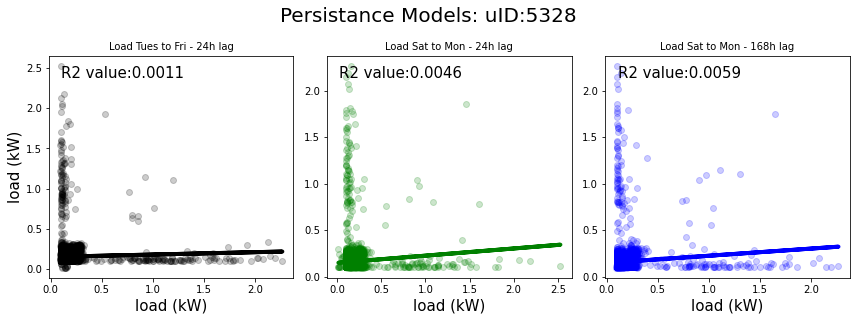

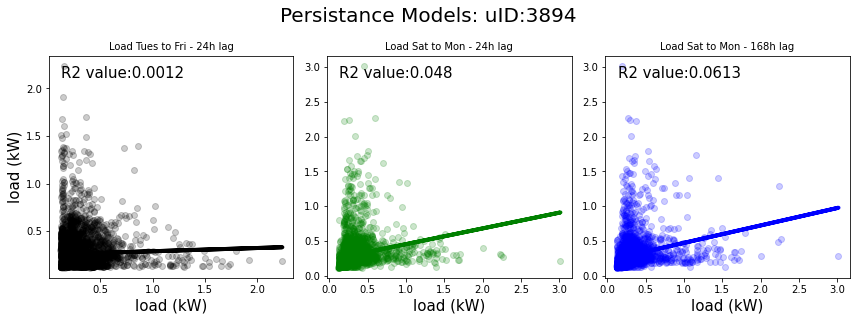

In [44]:
# Plot persistance models for the uIDs with WORST r2 values (TtoF data) selected above

for uID in uIDs_worst:
    uID_load  = hourly_df.loc[uID]         
    #print(uID)
    
    lDataTtoF = persistDataArrayVersion2(uID_load,smplsPerDay=24,nDays=365,dayClass=[1,2,3,4],lagD=1,refDay=0)
    lDataStoM = persistDataArrayVersion2(uID_load,smplsPerDay=24,nDays=365,dayClass=[5,6,0],lagD=1,refDay=0)
    lDataStoM_7d = persistDataArrayVersion2(uID_load,smplsPerDay=24,nDays=365,dayClass=[5,6,0],lagD=7,refDay=7)  

    fig,ax1,ax2,ax3=peristModelPlot(lDataTtoF,lDataStoM,lDataStoM_7d,supTitle='uID',uID=uID)
    r2RegPlot(lDataTtoF[0], lDataTtoF[1], fig,ax1,'k')
    r2RegPlot(lDataStoM[0], lDataStoM[1], fig,ax2,'g')
    r2RegPlot(lDataStoM_7d[0], lDataStoM_7d[1], fig,ax3,'b')

   

In [45]:
# Plot persistance models for specific uIDs in report profile plot
uIDsToPlot=[[784,5402],[1656]]

In [46]:
uIDsToPlot = [val for sublist in uIDsToPlot for val in sublist] 
uIDsToPlot

[784, 5402, 1656]

In [47]:

# set fontsizes etc for plotting 
#plt.rcParams["axes.labelsize"] = 12
#plt.rc('xtick', labelsize=12)
#plt.rc('ytick', labelsize=12)

#plt.rcParams.update({'legend.fontsize':10}) 
plt.rcParams.update({'figure.titlesize': 14}) 
#plt.rcParams.update({'axes.titlesize':12}) 

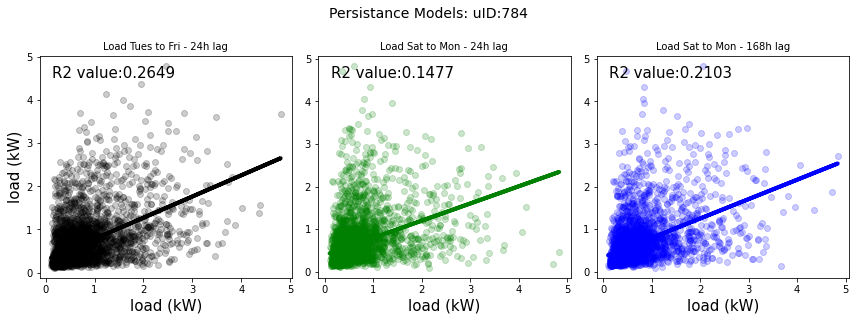

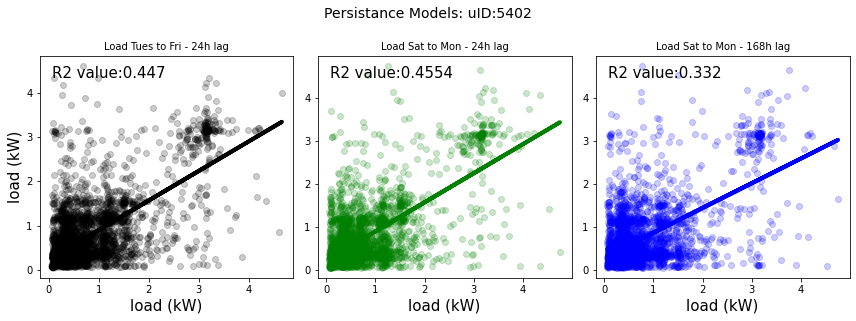

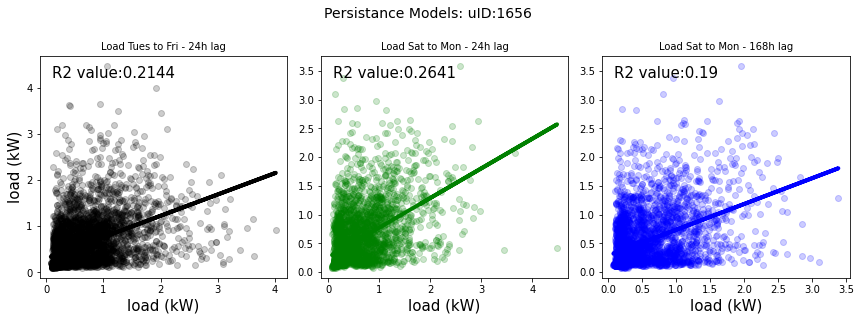

In [48]:

for uID in uIDsToPlot:
    uID_load  = hourly_df.loc[uID]         
    #print(uID)
    
    lDataTtoF = persistDataArrayVersion2(uID_load,smplsPerDay=24,nDays=365,dayClass=[1,2,3,4],lagD=1,refDay=0)
    lDataStoM = persistDataArrayVersion2(uID_load,smplsPerDay=24,nDays=365,dayClass=[5,6,0],lagD=1,refDay=0)
    lDataStoM_7d = persistDataArrayVersion2(uID_load,smplsPerDay=24,nDays=365,dayClass=[5,6,0],lagD=7,refDay=7)  

    fig,ax1,ax2,ax3=peristModelPlot(lDataTtoF,lDataStoM,lDataStoM_7d,supTitle='uID',uID=uID)
    r2RegPlot(lDataTtoF[0], lDataTtoF[1], fig,ax1,'k')
    r2RegPlot(lDataStoM[0], lDataStoM[1], fig,ax2,'g')
    r2RegPlot(lDataStoM_7d[0], lDataStoM_7d[1], fig,ax3,'b')

   

Now use different window widths to extract optimal persistance model xs,ys pairs:

Process for estimating predictability of user based on perisistance model window size   
Loop through window widths from 0 (+/-0 1hr) to 24 (+/-12) hrs where for each:

1. Construct input data array containing xs,ys series (for TtoF,StoM, StoM-7d models);  function: persistDataWindowed    
2. Compute r2 values for uIDs or Aggregate for same models;  function: get_r2


In [49]:

# set fontsizes etc for plotting 
plt.rcParams["axes.labelsize"] = 18
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

#plt.rcParams.update({'legend.fontsize':10}) 
plt.rcParams.update({'figure.titlesize': 16}) 
plt.rcParams.update({'axes.titlesize':16}) 

0
0  0.966743
1  0.990752

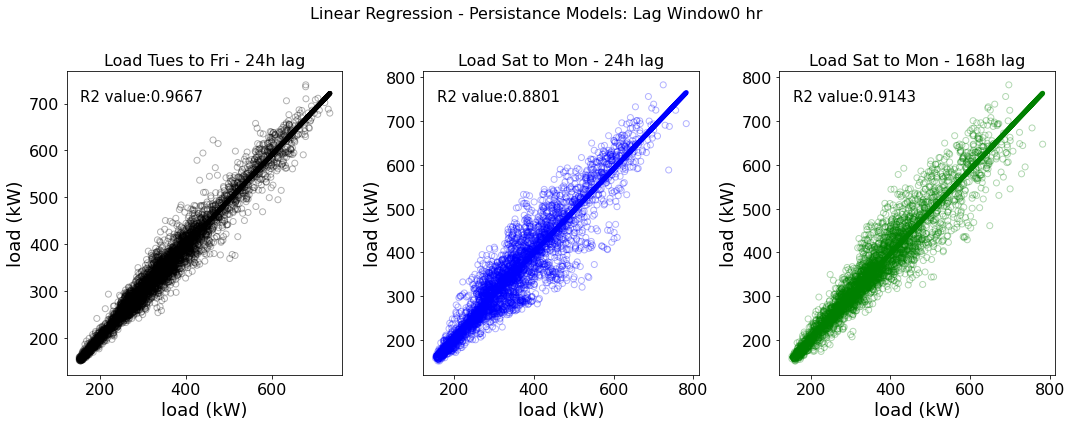

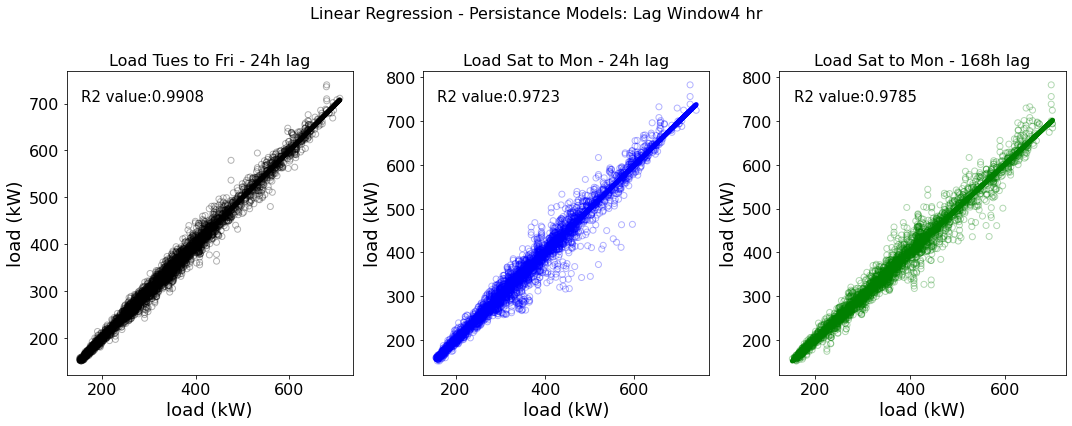

In [50]:
# first run for Aggregate load case : calculate R2 for a series of window widths ranging from 0 (default) to +/- 12hr

pdLoadSeries=aggregateLoad
smplsPerDay=24
nDays=365
titles=['Load Tues to Fri - 24h lag','Load Sat to Mon - 24h lag','Load Sat to Mon - 168h lag']
r2_vals=[]
r2_TtoF=[]
r2_StoM=[]
r2_StoM_7d=[]

df_r2_TtoF=pd.DataFrame()
df_r2_StoM=pd.DataFrame()
df_r2_StoM_7d=pd.DataFrame()
DoW_dfs_dict = {'TtoF':df_r2_TtoF,'StoM':df_r2_StoM,'StoM_7d':df_r2_StoM_7d}

for w in [0,4]:          # for report plot
#for w in [0,1,2,3,4,5,6,12]:
    
    # get load series for each DoW class
    lDataTtoF_W = persistDataWindowed(pdLoadSeries,smplsPerDay,nDays,w,dayClass=[1,2,3,4],lagD=1,refDay=0)
    lDataStoM_W = persistDataWindowed(pdLoadSeries,smplsPerDay,nDays,w,dayClass=[5,6,0],lagD=1,refDay=0)
    lDataStoM_7d_W = persistDataWindowed(pdLoadSeries,smplsPerDay,nDays,w,dayClass=[5,6,0],lagD=7,refDay=7)
    fig = plt.figure(figsize=(15,6))  # create empty input figure which can be appended inside r2_get function

    # get R2 value for each DoW class
    r2a = r2_get(lDataTtoF_W,plot='y',print='n',cl='k',inputFigObject=fig,inputAx='None',subplotPos=1,subplotTitle=titles[0]) 
    r2b = r2_get(lDataStoM_W,plot='y',print='n',cl='b',inputFigObject=fig,inputAx='None',subplotPos=2,subplotTitle=titles[1]) 
    r2c = r2_get(lDataStoM_7d_W,plot='y',print='n',cl='g',inputFigObject=fig,inputAx='None',subplotPos=3,subplotTitle=titles[2])
    #DoW_r2_dict = ['TtoF':r2_TtoF,'StoM':r2_StoM,'StoM_7d':r2_StoM_7d]
    
    r2_TtoF.append([r2a])
    r2_StoM.append([r2b])
    r2_StoM_7d.append([r2c])
                      
    r2_vals.append([r2a,r2b,r2c])

    fig.suptitle('Linear Regression - Persistance Models: Lag Window' + str(w)+' hr')         

    fig.tight_layout()
    fig.subplots_adjust(top=0.83)
    
fname = '../project_data/FiguresLCL/Aggregate Persistance Models - linear regression for suite of window bin widths.png'
fig.savefig(fname, dpi=300, format='png',  bbox_inches='tight')  

#print("r2_TtoF: \n",r2_TtoF)
#print(pd.DataFrame(r2_TtoF))

df_r2_TtoF=pd.concat([df_r2_TtoF,pd.DataFrame(r2_TtoF)],axis=1)
df_r2_StoM=pd.concat([df_r2_StoM,pd.DataFrame(r2_StoM)],axis=1)
df_r2_StoM_7d=pd.concat([df_r2_StoM_7d,pd.DataFrame(r2_StoM_7d)],axis=1)
df_r2_TtoF


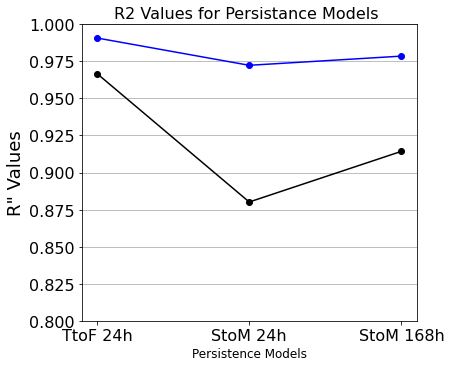

In [51]:
# Plot R2 vals from aggregate case above

fig = plt.figure(figsize=(6,12))
ax1 = fig.add_subplot(211)

x=np.arange(1,4,1)
cl=['k','b','g','r','m','y','c','grey']

for i in range(len(r2_vals)):
    ax1.plot(x,r2_vals[i],color=cl[i])
    ax1.scatter(x,r2_vals[i],color=cl[i])

ax1.set_xticks(x)
ax1.set_xticklabels(['TtoF 24h', 'StoM 24h', 'StoM 168h'])
ax1.set_xlabel('Persistence Models', fontsize=12)
ax1.set_ylabel('R" Values')
ax1.set_ylim([0.8,1])

ax1.set_title('R2 Values for Persistance Models ')
ax1.grid(axis='y')
 

In [52]:
# now run for individual uIDs 

uIDs=hourly_df.index.values
len(uIDs)
uIDs

array([   2,   10,   18,   19,   27,   40,   49,   57,   60,   91, ...,
       5461, 5463, 5475, 5518, 5525, 5526, 5527, 5530, 5539, 5540],
      dtype=int64)

Loop thro uIDs and calc r2 for each uID :
 compute 3 r2 values for each uID: TtoF,StoM (t-24) model and StoM (t-168) model

In [53]:
# firstly: run TEST for small subset of uID, windowHW to plot results and check working , estimate time required etc
uIDs_test=uIDs[0:2]

2
Wall time: 911 ms
Wall time: 1.8 s
Wall time: 1.89 s
R2 Values for uID: 2 for window HW in  [0, 1, 2] are : [2, [0.2539129548931274, 0.1603990304357943, 0.09731284784467253], [0.5821929033874048, 0.5069512450243302, 0.37052905168838], [0.7255526106975871, 0.6861108388245056, 0.5411107662078111]]
10
Wall time: 859 ms
Wall time: 1.29 s
Wall time: 1.98 s
R2 Values for uID: 10 for window HW in  [0, 1, 2] are : [10, [0.2913619780886628, 0.23431434294685494, 0.26580039809799905], [0.682487912367076, 0.6321569737537704, 0.6733032816517522], [0.8101218808336316, 0.7685530323413003, 0.7973319478729022]]


{'TtoF':          2         10
 0  0.253913  0.291362
 1  0.582193  0.682488
 2  0.725553  0.810122,
 'StoM':          2         10
 0  0.160399  0.234314
 1  0.506951  0.632157
 2  0.686111  0.768553,
 'StoM_7d':          2         10
 0  0.097313  0.265800
 1  0.370529  0.673303
 2  0.541111  0.797332}

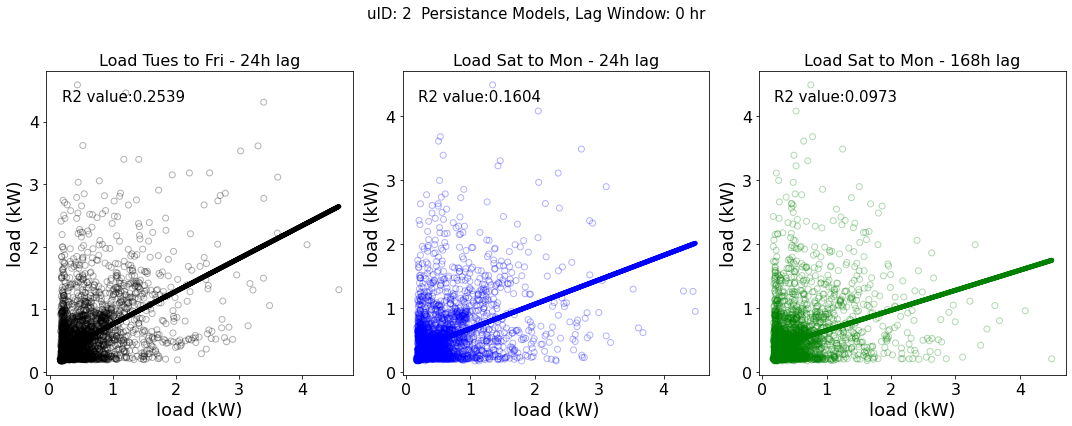

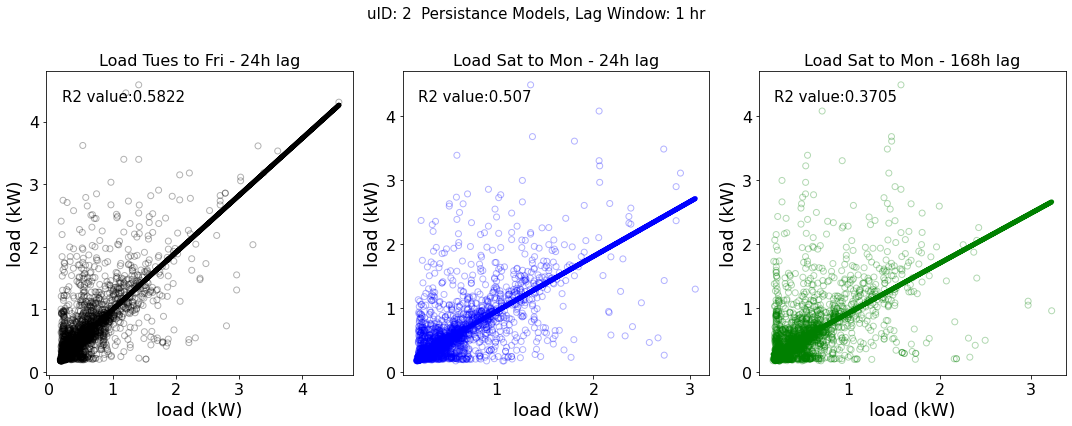

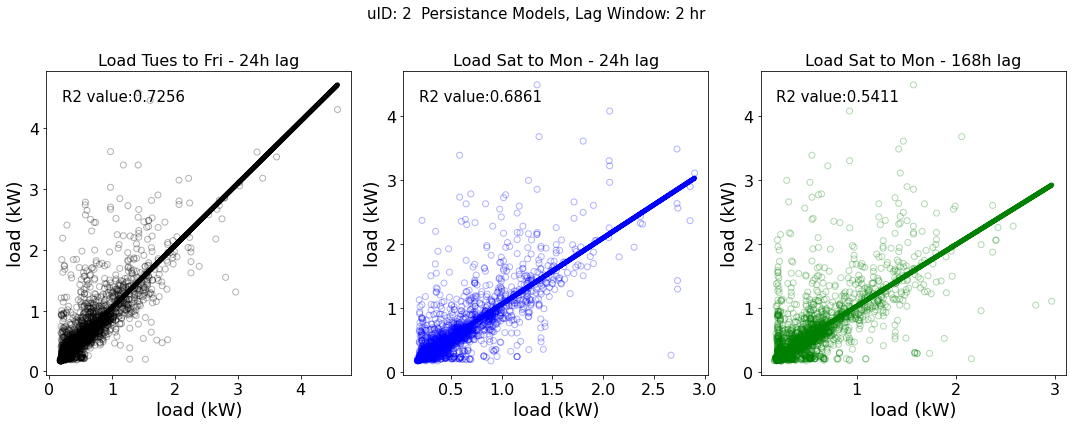

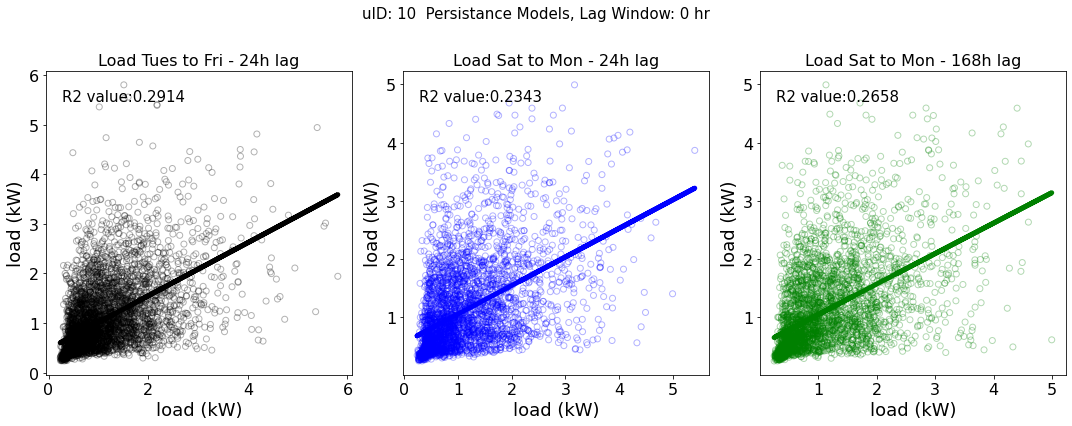

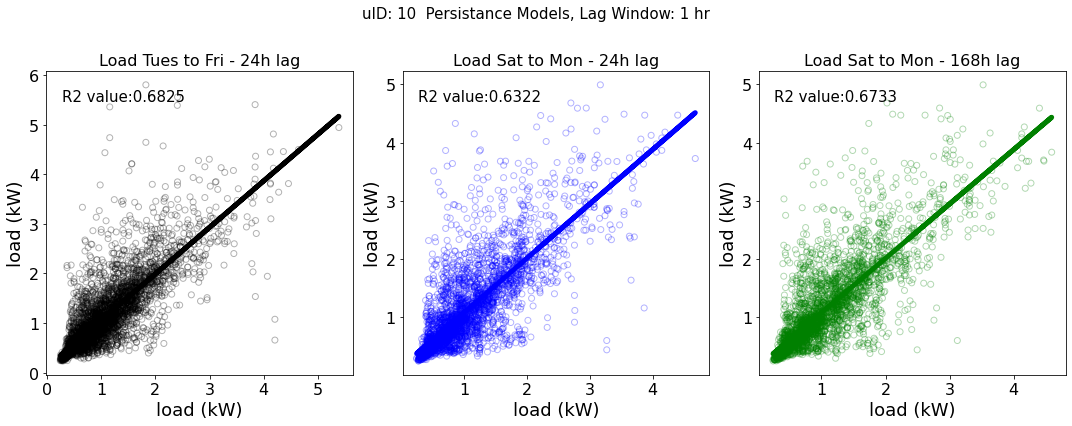

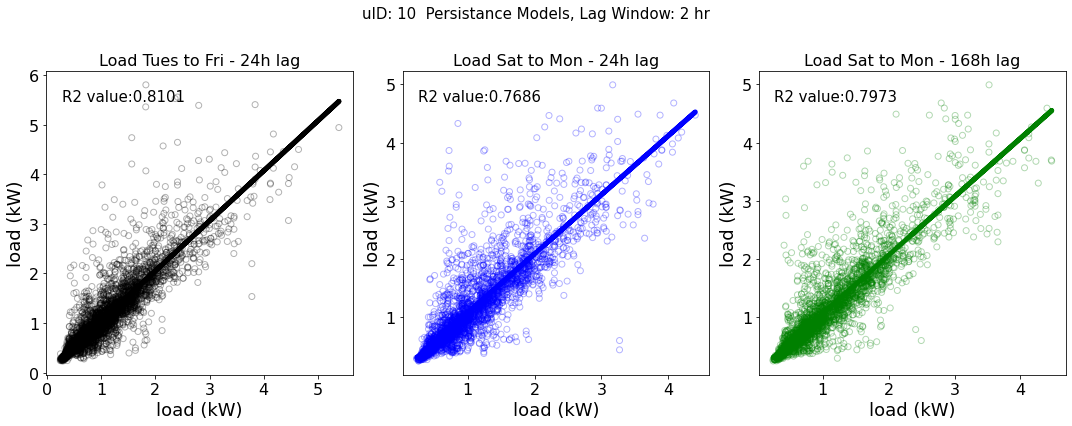

In [74]:
smplsPerDay=24
nDays=365
titles=['Load Tues to Fri - 24h lag','Load Sat to Mon - 24h lag','Load Sat to Mon - 168h lag']

#windows=[0,1,2,3,4,5,6,12]        # set all window half widths (hrs) that we want to compute 
windows=[0,1,2]

# set output dataframe column names
colBaseNames=['r2_TtoF_w','r2_StoM_w','r2_StoM7d_w']
colNames=['uID']
DoWclasses=['uID]']

for w in windows:
    a=str(colBaseNames[0])+str(w)
    b=str(colBaseNames[1])+str(w)
    c=str(colBaseNames[2])+str(w)
    colNames.extend([a,b,c])
    a=str(colBaseNames[0])
    b=str(colBaseNames[1])
    c=str(colBaseNames[2])
    DoWclasses.extend([a,b,c])    
    
#print("column names: ",colNames) 
#print("DoWclasses: ",DoWclasses)

#r2List_uIDs=[]    # list to hold all R2 values

#initialize dataframes to hold uID r2 values
df_r2_TtoF=pd.DataFrame()
df_r2_StoM=pd.DataFrame()
df_r2_StoM_7d=pd.DataFrame()

for uID in uIDs_test:
    uID_load  = hourly_df.loc[uID]      
    print(uID)
    
    #initialize lists to hold r2 for each window value
    r2_TtoF=[]
    r2_StoM=[]
    r2_StoM_7d=[]
    r2_vals=[uID]  # all r2 combined (ie all DoW classes and window sizes)

    # now for uID, loop through window range 
    for w in windows:
        %time lDataTtoF_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[1,2,3,4],lagD=1,refDay=0)
        lDataStoM_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[5,6,0],lagD=1,refDay=0)
        lDataStoM_7d_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[5,6,0],lagD=7,refDay=7)
        fig = plt.figure(figsize=(15,6))  # create empty input figure which can be appended inside r2_get function

        r2a = r2_get(lDataTtoF_W,plot='y',print='n',cl='k',inputFigObject=fig,subplotPos=1,subplotTitle=titles[0]) 
        r2b = r2_get(lDataStoM_W,plot='y',print='n',cl='b',inputFigObject=fig,subplotPos=2,subplotTitle=titles[1]) 
        r2c = r2_get(lDataStoM_7d_W,plot='y',print='n',cl='g',inputFigObject=fig,subplotPos=3,subplotTitle=titles[2])

        r2_TtoF.append([r2a])
        r2_StoM.append([r2b])
        r2_StoM_7d.append([r2c])
                      
        r2_vals.append([r2a,r2b,r2c])
        #r2_vals.extend([r2_TtoF,r2_StoM,r2_StoM_7d]) # grouping r2 values by 3 dayclasses

        fig.suptitle('uID: '+str(uID)+'  Persistance Models, Lag Window: ' + str(w)+' hr',fontsize=15)         

        fig.tight_layout()
        fig.subplots_adjust(top=0.83)
    
    print("R2 Values for uID:",uID,"for window HW in ",windows,"are :",r2_vals)
    #r2List_uIDs.append(r2_vals)   # iteratvely append list of R2 values for current uID

    df_r2_TtoF=pd.concat([df_r2_TtoF,pd.DataFrame(r2_TtoF,columns=[uID])],axis=1)
    df_r2_StoM=pd.concat([df_r2_StoM,pd.DataFrame(r2_StoM,columns=[uID])],axis=1)
    df_r2_StoM_7d=pd.concat([df_r2_StoM_7d,pd.DataFrame(r2_StoM_7d,columns=[uID])],axis=1)
    
for df in [df_r2_TtoF,df_r2_StoM,df_r2_StoM_7d]:
    df.index = windows


DoW_dfs_dict = {'TtoF':df_r2_TtoF,'StoM':df_r2_StoM,'StoM_7d':df_r2_StoM_7d}
DoW_dfs_dict

# Next bit takes > 6 hrs (on laptop) to run

In [ ]:
# now run for all uIDs without plotting
smplsPerDay=24
nDays=365

windows=[0,1,2,3,4,5,6,12]        # set all window half widths (hrs) that we want to compute 

# set output dataframe column names
colBaseNames=['r2_TtoF_w','r2_StoM_w','r2_StoM7d_w']
colNames=['uID']

for w in windows:      # create column names for o/p dataframe
    a=str(colBaseNames[0])+str(w)
    b=str(colBaseNames[1])+str(w)
    c=str(colBaseNames[2])+str(w)
    colNames.extend([a,b,c])
    
r2List_uIDs=[]    # list to hold all R2 values

for uID in uIDs:                        # or for Grp in [grp,0,grp1,grp2...] for aggregation level test
    start_time = time.time()
    
    uID_load  = hourly_df.loc[uID]      # selevct load data (eg individual or aggregate of N households)

    r2_vals=[uID]
    
    # now for uID, loop through window range 
    for w in windows:
        lDataTtoF_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[1,2,3,4],lagD=1,refDay=0)
        lDataStoM_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[5,6,0],lagD=1,refDay=0)
        lDataStoM_7d_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[5,6,0],lagD=7,refDay=7)
        #fig = plt.figure(figsize=(15,6))  # create empty input figure which can be appended inside r2_get function

        r2_TtoF = r2_get(lDataTtoF_W) 
        r2_StoM = r2_get(lDataStoM_W) 
        r2_StoM_7d = r2_get(lDataStoM_7d_W)

        
        r2_TtoF.append([r2a])
        r2_StoM.append([r2b])
        r2_StoM_7d.append([r2c])
                      
        r2_vals.append([r2a,r2b,r2c])

        
        
        
        
        r2_vals.extend([r2_TtoF,r2_StoM,r2_StoM_7d])  # add 3 sets of R2 values to list (row)
        # calculate execution time and print
 
    r2List_uIDs.append(r2_vals)   # iteratvely append list of R2 values for current uID
    print("uID: ",uID,"--- %s seconds ---" % (time.time() - start_time)) 


r2uIDsW_df = pd.DataFrame(r2List_uIDs,columns = colNames)
r2uIDsW_df = r2uIDsW_df.set_index('uID')
r2uIDsW_df


In [ ]:
#r2uIDsW_df.to_csv('../project_data/intermediateDataLCL/r2uIDsW_df.csv')
r2uIDsW_df.to_pickle('../project_data/intermediateDataLCL/LCL5_r2uIDsW_df.pkl')

In [ ]:
r2_histogram(r2uIDsW_df,pltTitle='Window Bins +/- 1hr to +/-12 hrs',SaveFigTitle='Persistence Models - R2 multi-window Histogram')

In [65]:
r2uIDsW_df=pd.read_pickle('../project_data/intermediateDataLCL/LCL5_r2uIDsW_df.pkl')

In [66]:
r2uIDsW_df

r2_TtoF_w0  r2_StoM_w0  r2_StoM7d_w0  r2_TtoF_w1  r2_StoM_w1  \
uID                                                                  
2       0.253913    0.160399      0.097313    0.582193    0.506951   
10      0.291362    0.234314      0.265800    0.682488    0.632157   
18      0.064484    0.070400      0.016962    0.280609    0.293936   
19      0.354416    0.151419      0.163640    0.652347    0.544947   
27      0.187013    0.011887      0.107292    0.582219    0.208186   
...          ...         ...           ...         ...         ...   
5526    0.177836    0.078406      0.135589    0.565952    0.459435   
5527    0.336339    0.285877      0.256924    0.665028    0.640918   
5530    0.279995    0.408710      0.425203    0.560458    0.680579   
5539    0.123316    0.069258      0.086562    0.533671    0.434954   
5540    0.091808    0.046541      0.032142    0.444464    0.356453   

      r2_StoM7d_w1  r2_TtoF_w2  r2_StoM_w2  r2_StoM7d_w2  r2_TtoF_w3  \
uID                                                                    
2         0.370529    0.725553    0.686111      0.541111    0.784350   
10        0.673303    0.810122    0.768553      0.797332    0.870454   
18        0.152005    0.450929    0.466457      0.317567    0.563370   
19        0.494240    0.725123    0.660934      0.583527    0.751245   
27        0.444998    0.707909    0.380238      0.613466    0.768764   
...            ...         ...         ...           ...         ...   
5526      0.519619    0.671966    0.588367      0.599433    0.705817   
5527      0.578073    0.789345    0.789595      0.718643    0.840361   
5530      0.679553    0.686662    0.778194      0.775765    0.756767   
5539      0.447288    0.685646    0.594846      0.597245    0.754031   
5540      0.323180    0.570086    0.511461      0.448782    0.625616   

      r2_StoM_w3  r2_StoM7d_w3  r2_TtoF_w4  r2_StoM_w4  r2_StoM7d_w4  \
uID                                                                    
2       0.760597      0.637471    0.813829    0.803854      0.691965   
10      0.849061      0.859041    0.900031    0.879663      0.887130   
18      0.581033      0.443967    0.619670    0.638291      0.517192   
19      0.711778      0.640875    0.768256    0.754773      0.675391   
27      0.534739      0.695606    0.814664    0.627490      0.739805   
...          ...           ...         ...         ...           ...   
5526    0.624266      0.625386    0.730855    0.663031      0.642950   
5527    0.857669      0.783848    0.863633    0.888244      0.814858   
5530    0.829905      0.829219    0.804959    0.857152      0.860081   
5539    0.675443      0.677501    0.789199    0.727969      0.731904   
5540    0.615894      0.502218    0.657553    0.666921      0.559563   

      r2_TtoF_w5  r2_StoM_w5  r2_StoM7d_w5  r2_TtoF_w6  r2_StoM_w6  \
uID                                                                  
2       0.835042    0.825173      0.726695    0.856205    0.841224   
10      0.920667    0.904208      0.910096    0.931522    0.924377   
18      0.660164    0.681286      0.558193    0.699575    0.701494   
19      0.785269    0.786404      0.704281    0.797499    0.810449   
27      0.833776    0.713211      0.779882    0.846240    0.769437   
...          ...         ...           ...         ...         ...   
5526    0.744217    0.682879      0.666019    0.759104    0.690815   
5527    0.877267    0.901979      0.838287    0.887428    0.909244   
5530    0.833353    0.877021      0.878415    0.849098    0.888598   
5539    0.809768    0.749652      0.772357    0.830209    0.776928   
5540    0.689888    0.704614      0.592407    0.714099    0.723879   

      r2_StoM7d_w6  r2_TtoF_w12  r2_StoM_w12  r2_StoM7d_w12  
uID                                                          
2         0.750659     0.913269     0.885382       0.821551  
10        0.920388     0.960766     0.957196       0.951836  
18        0.588850     0.772757     0.760413       0.649439  


In [206]:
# set output dataframe column names
colBaseNames=['r2_TtoF_whw','r2_StoM_whw','r2_StoM7d_whw']
colNames=['uID']

windows=[0,1,2,3,4,5,6,12]        # set all window half widths (hrs) that we want to compute 
DoWclasses=['uID]']

for w in windows:
    a=str(colBaseNames[0])
    b=str(colBaseNames[1])
    c=str(colBaseNames[2])
    DoWclasses.extend([a,b,c])    
DoWclasses

['uID]',
 'r2_TtoF_whw',
 'r2_StoM_whw',
 'r2_StoM7d_whw',
 'r2_TtoF_whw',
 'r2_StoM_whw',
 'r2_StoM7d_whw',
 'r2_TtoF_whw',
 'r2_StoM_whw',
 'r2_StoM7d_whw',
 'r2_TtoF_whw',
 'r2_StoM_whw',
 'r2_StoM7d_whw',
 'r2_TtoF_whw',
 'r2_StoM_whw',
 'r2_StoM7d_whw',
 'r2_TtoF_whw',
 'r2_StoM_whw',
 'r2_StoM7d_whw',
 'r2_TtoF_whw',
 'r2_StoM_whw',
 'r2_StoM7d_whw',
 'r2_TtoF_whw',
 'r2_StoM_whw',
 'r2_StoM7d_whw']

In [207]:
# get median and mean R2 values for each a) day class b) window width
#print(r2uIDsW_df.mean(axis = 0))
r2Medians = np.asarray(r2uIDsW_df.median(axis = 0)).reshape(-1,3).tolist()
r2Means = np.asarray(r2uIDsW_df.mean(axis = 0)).reshape(-1,3).tolist()

len(r2Means)
r2Means

[[0.24578529467497462, 0.1799189606989394, 0.19878213395150157],
 [0.5678878958720869, 0.4897596747157738, 0.5111645827723014],
 [0.6931169220835512, 0.6351118612764793, 0.6439355541438868],
 [0.7540298558144498, 0.7104981249661338, 0.7113256750203181],
 [0.7896293459149795, 0.7557313946714964, 0.7514814675409909],
 [0.8120555271846112, 0.7853988022603217, 0.7778214114012161],
 [0.8278798703718793, 0.8059905638199018, 0.7964417435346773],
 [0.8821083441350207, 0.8661182723591373, 0.8517701047110251]]

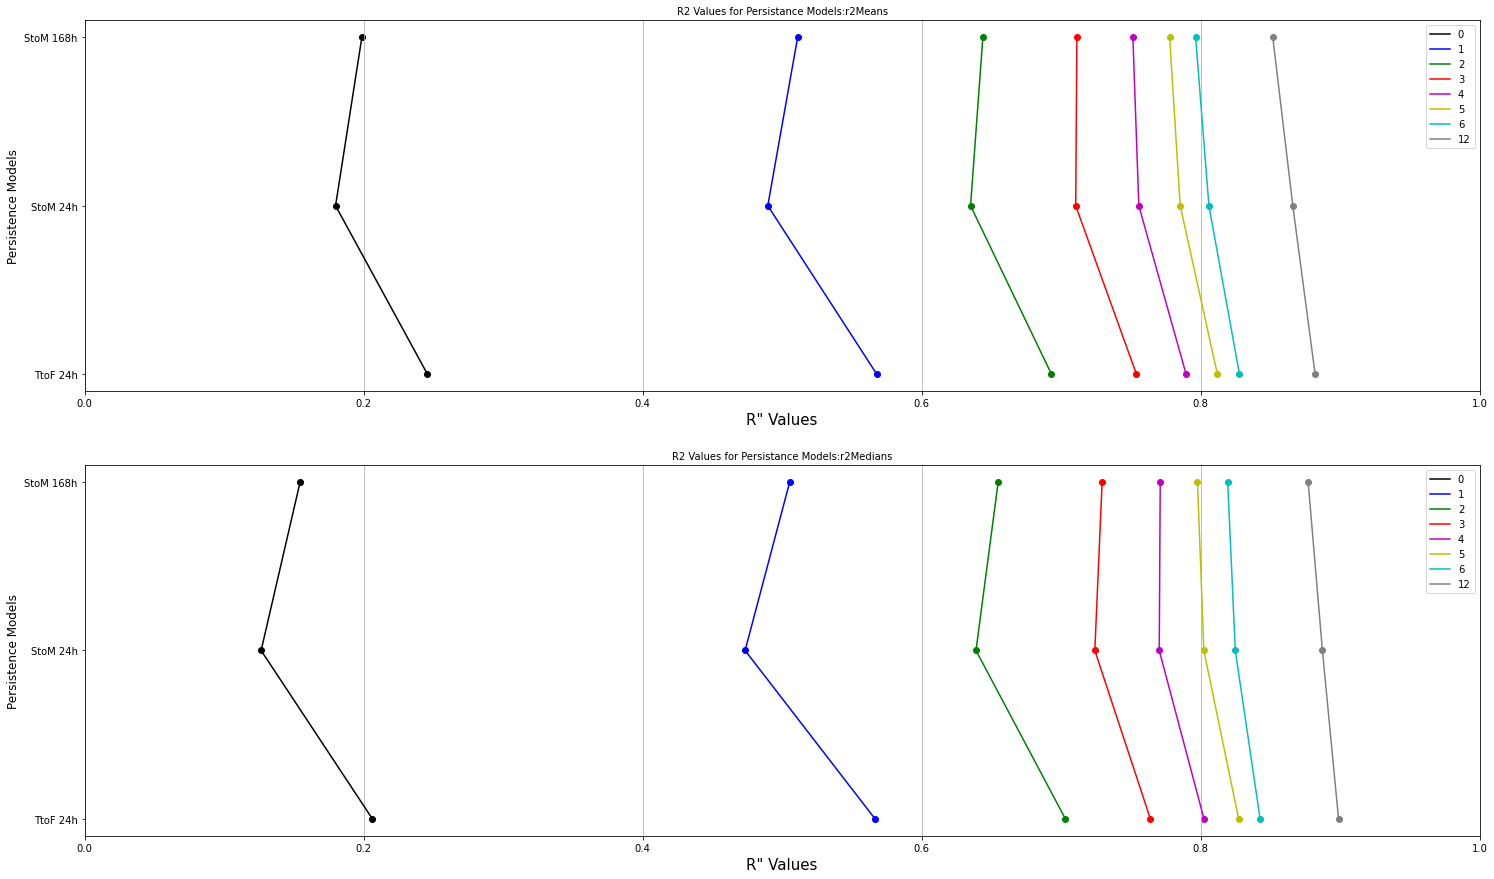

In [208]:
# Plot R2 vals means and medians for aggregate case above

#fig = plt.figure(figsize=(18,20))
fig = plt.figure(figsize=(25,15))
#ax1 = fig.add_subplot(111)

windows=[0,1,2,3,4,5,6,12] 
x=np.arange(1,4,1)
cl=['k','b','g','r','m','y','c','grey']
titles=['r2Means','r2Medians']
for i,list in enumerate([r2Means,r2Medians]):
    ax1 = fig.add_subplot(2,1,i+1)
    for j in range(len(r2Means)):
        ax1.plot(list[j],x,color=cl[j],label=windows[j])
        ax1.scatter(list[j],x,color=cl[j])

    ax1.set_yticks(x)
    ax1.set_yticklabels(['TtoF 24h', 'StoM 24h', 'StoM 168h'])
    ax1.set_ylabel('Persistence Models', fontsize=12)
    ax1.set_xlabel('R" Values')
    ax1.set_xlim([0.0,1])
    ax1.legend()

    ax1.set_title('R2 Values for Persistance Models:'+str(titles[i]))
    ax1.grid(axis='x')


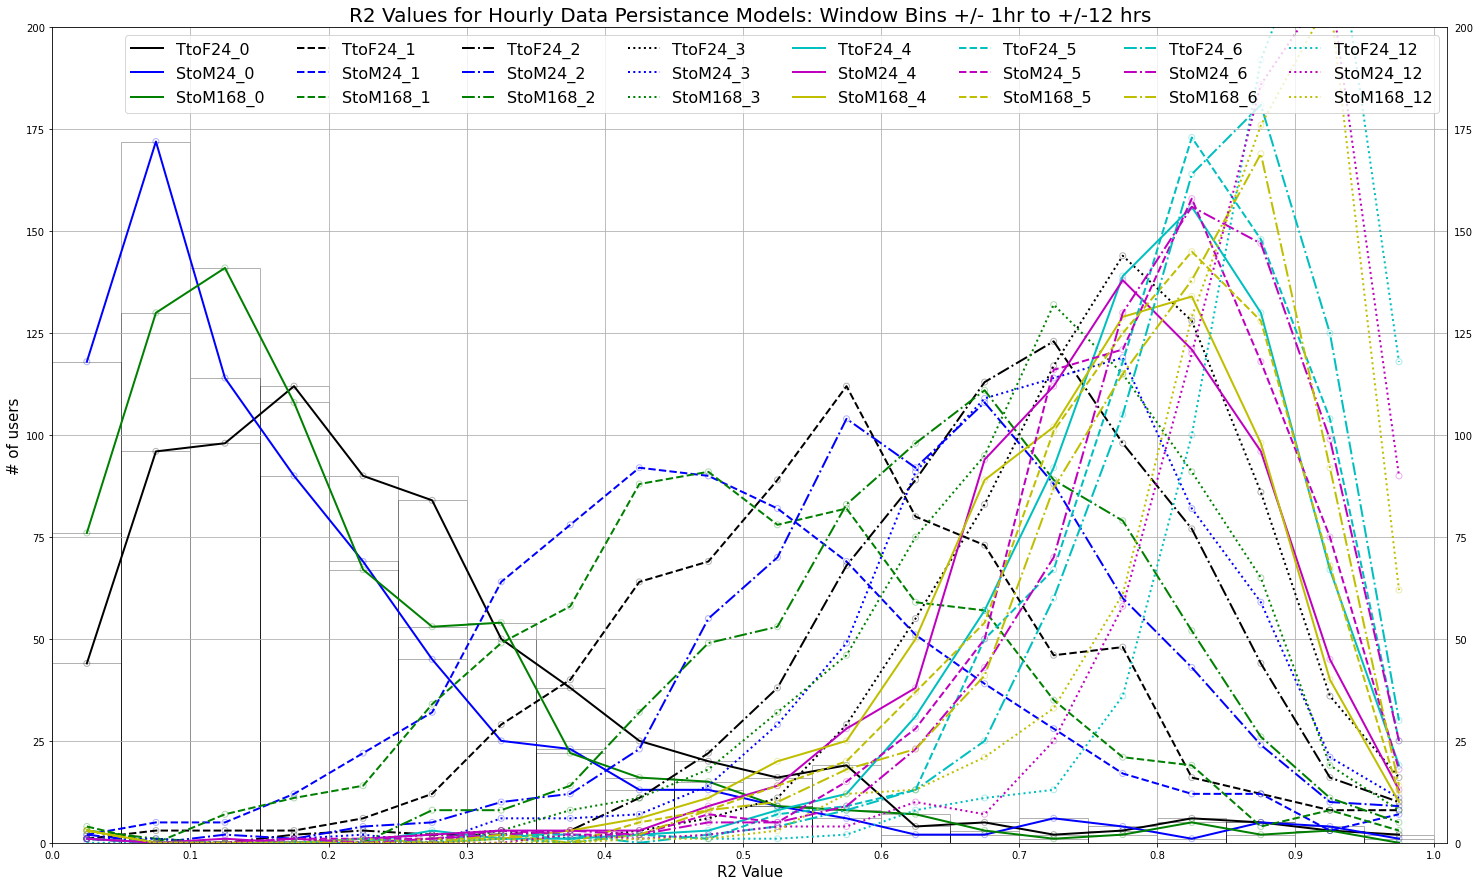

In [209]:
r2_histogram(r2uIDsW_df,pltTitle='Window Bins +/- 1hr to +/-12 hrs',SaveFigTitle='Persistence Models - R2 multi-window Histogram')

In [226]:
r2uIDsW_df.columns
TtoF_cols = [col for col in r2uIDsW_df.columns if 'TtoF' in col]
r2uIDsW_df[TtoF_cols]
np.array(r2uIDsW_df.columns).reshape(-1,3)

array([['r2_TtoF_w0', 'r2_StoM_w0', 'r2_StoM7d_w0'],
       ['r2_TtoF_w1', 'r2_StoM_w1', 'r2_StoM7d_w1'],
       ['r2_TtoF_w2', 'r2_StoM_w2', 'r2_StoM7d_w2'],
       ['r2_TtoF_w3', 'r2_StoM_w3', 'r2_StoM7d_w3'],
       ['r2_TtoF_w4', 'r2_StoM_w4', 'r2_StoM7d_w4'],
       ['r2_TtoF_w5', 'r2_StoM_w5', 'r2_StoM7d_w5'],
       ['r2_TtoF_w6', 'r2_StoM_w6', 'r2_StoM7d_w6'],
       ['r2_TtoF_w12', 'r2_StoM_w12', 'r2_StoM7d_w12']], dtype=object)

Persistence Models R2 multi-window Histogram Greyscale


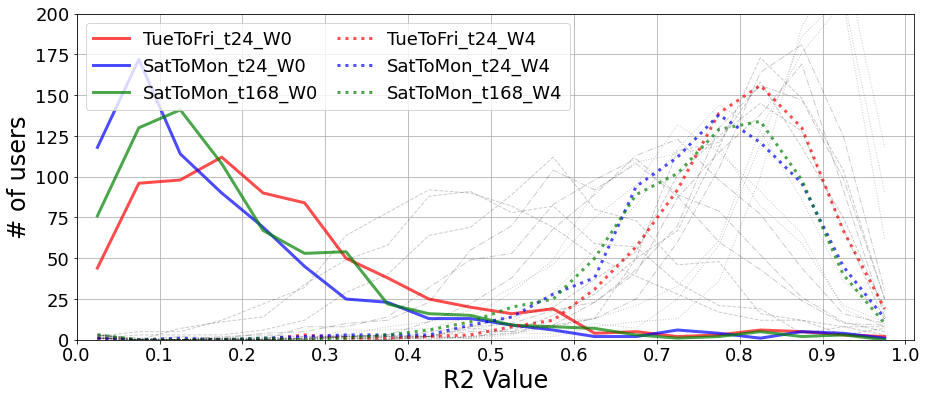

In [227]:
r2_histogramV2(r2uIDsW_df,pltTitle='Window Bins +/- 1hr to +/-12 hrs',\
               SaveFigTitle='Persistence Models R2 multi-window Histogram Greyscale')

In [43]:
# next step :  

# R2 for each aggregation level N=1,5,10,......,100 where for each N
#    loop through window search width +/- x hrs
    


# Now run  persistDataWindowed on subsets of size N users: 
#output:  = df of R2 values    of dimensions #grps × 24 for each N   , takes about 4 hrs to run


In [45]:
aggregation_N = [3,6,12,25,50,75,100]   # just short of 7 hrs to run this config

In [66]:
r2Agg = {}  # create empty dictionary to hold set of dataframes with R2 stats for each aggregation level

aggregation_N = [3,6,12,25,50,75,100]   # just short of 7 hrs to run this config
#aggregation_N = [350]  # for testing

smplsPerDay=24
nDays=365

windows=[0,1,2,3,4,5,6,12]        # set all window half widths (hrs) that we want to compute 
#windows=[0,1,2]   # testing

# set output dataframe column names
colBaseNames=['r2_TtoF','r2_StoM','r2_StoM7d']
colNames=['uID']

#for w in windows:      # create column names for o/p dataframe
#    a=str(colBaseNames[0])
#    b=str(colBaseNames[1])
#    c=str(colBaseNames[2])
#    colNames.extend([a,b,c])
#    for i in range(len(colBaseNames)):
#        windowsCol.append(w)
    
for N in aggregation_N:

    # Run 'out of sample' selection of random user subsets of size N
    df_randIDgrps_N = randomUserGroups(hourly_df,N)

    # loop through randID groups and get aggregate load series for each
    df_grpAggLoad_N = randomUserGroupAggregate(hourly_df,df_randIDgrps_N)
    
    #initialize dataframes to hold uID r2 values for N
    df_r2_TtoF=pd.DataFrame()
    df_r2_StoM=pd.DataFrame()
    df_r2_StoM_7d=pd.DataFrame()
    
    #Loop through each aggregate group of size N
    for i,uID in  enumerate(df_grpAggLoad_N.columns):     #col in [grp,0,grp1,grp2...etc] for each N
        start_time = time.time()

        #uID_load  = hourly_df.loc[uID]   
        uID_load = df_grpAggLoad_N[uID]      # select load data (eg individual or aggregate of N households)

        #initialize lists to hold r2 for each window value
        r2_TtoF=[]
        r2_StoM=[]
        r2_StoM_7d=[]

        # now for grp/uID, loop through window range 
        for w in windows:
            lDataTtoF_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[1,2,3,4],lagD=1,refDay=0)
            lDataStoM_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[5,6,0],lagD=1,refDay=0)
            lDataStoM_7d_W = persistDataWindowed(uID_load,smplsPerDay,nDays,w,dayClass=[5,6,0],lagD=7,refDay=7)
            #fig = plt.figure(figsize=(15,6))  # create empty input figure which can be appended inside r2_get function

            r2a = r2_get(lDataTtoF_W) 
            r2b = r2_get(lDataStoM_W) 
            r2c = r2_get(lDataStoM_7d_W)
            
            r2_TtoF.append([r2a])
            r2_StoM.append([r2b])
            r2_StoM_7d.append([r2c])
            
        print("For aggregation level N:",N,"Grp/uID: ",uID,"-- %s seconds --" % (time.time() - start_time),"time --%s--" % time.asctime()) 

        df_r2_TtoF=pd.concat([df_r2_TtoF,pd.DataFrame(r2_TtoF,columns=[uID])],axis=1)
        df_r2_StoM=pd.concat([df_r2_StoM,pd.DataFrame(r2_StoM,columns=[uID])],axis=1)
        df_r2_StoM_7d=pd.concat([df_r2_StoM_7d,pd.DataFrame(r2_StoM_7d,columns=[uID])],axis=1)
    
    for df in [df_r2_TtoF,df_r2_StoM,df_r2_StoM_7d]:
        df.index = windows
              
    d={}
    d['TtoF'] = df_r2_TtoF
    d['StoM'] =  df_r2_StoM
    d['StoM_7d'] = df_r2_StoM_7d
         
    r2Agg['%d' % (N)] = d

For aggregation level N: 3 Grp/uID:  grp3_0 -- 63.40046262741089 seconds -- time --Wed Jun 10 22:49:57 2020--
For aggregation level N: 3 Grp/uID:  grp3_1 -- 62.890735149383545 seconds -- time --Wed Jun 10 22:51:00 2020--
For aggregation level N: 3 Grp/uID:  grp3_2 -- 85.30060648918152 seconds -- time --Wed Jun 10 22:52:25 2020--
For aggregation level N: 3 Grp/uID:  grp3_3 -- 62.99249839782715 seconds -- time --Wed Jun 10 22:53:28 2020--
For aggregation level N: 3 Grp/uID:  grp3_4 -- 53.66909909248352 seconds -- time --Wed Jun 10 22:54:22 2020--
For aggregation level N: 3 Grp/uID:  grp3_5 -- 51.13123297691345 seconds -- time --Wed Jun 10 22:55:13 2020--
For aggregation level N: 3 Grp/uID:  grp3_6 -- 50.50280213356018 seconds -- time --Wed Jun 10 22:56:04 2020--
For aggregation level N: 3 Grp/uID:  grp3_7 -- 52.94104266166687 seconds -- time --Wed Jun 10 22:56:57 2020--
For aggregation level N: 3 Grp/uID:  grp3_8 -- 51.22658562660217 seconds -- time --Wed Jun 10 22:57:48 2020--
For aggre

In [91]:
#save to pickle !  commented out to avoid overwriting 
#with open('../project_data/intermediateDataLCL/r2Agg_LCL.pickle', 'wb') as f:
#    pickle.dump(r2Agg, f, protocol=pickle.HIGHEST_PROTOCOL)
#r2Agg.keys()

In [78]:
# read pickled dictionary
with open('../project_data/intermediateDataLCL/r2Agg_LCL.pickle', 'rb') as pickleFile:
    r2Agg = pickle.load(pickleFile, encoding='latin-1') 
    
r2Agg.keys()

dict_keys(['3', '6', '12', '25', '50', '75', '100'])

In [79]:
aggregation_N = [3,6,12,25,50,75,100]   # just short of 7 hrs to run this config

In [80]:
# flip r2Agg dictionary nest levels for dataframe, plotting, etc

from collections import defaultdict
import pprint

r2Agg_flipped = defaultdict(dict)

for key, val in r2Agg.items():
    #print("key: ",key,"val type: ",type(val))
    for subkey, subval in val.items():
        #print("subkey: ",subkey,"subval type: ",type(subval),"\n subval: \n",subval)
        r2Agg_flipped[subkey][key] = subval
        
dict(r2Agg_flipped)['TtoF'].keys()

dict_keys(['3', '6', '12', '25', '50', '75', '100'])

In [81]:
# create multilevel column names
colIdxLev1 = [['TtoF']*len(aggregation_N),['StoM']*len(aggregation_N),['StoM_7d']*len(aggregation_N)]
colIdxLev1 = [item for sublist in colIdxLev1 for item in sublist]
colIdxLev2 = [n for n in aggregation_N]*3
column_index = [colIdxLev1,colIdxLev2]
column_index

[['TtoF',
  'TtoF',
  'TtoF',
  'TtoF',
  'TtoF',
  'TtoF',
  'TtoF',
  'StoM',
  'StoM',
  'StoM',
  'StoM',
  'StoM',
  'StoM',
  'StoM',
  'StoM_7d',
  'StoM_7d',
  'StoM_7d',
  'StoM_7d',
  'StoM_7d',
  'StoM_7d',
  'StoM_7d'],
 [3,
  6,
  12,
  25,
  50,
  75,
  100,
  3,
  6,
  12,
  25,
  50,
  75,
  100,
  3,
  6,
  12,
  25,
  50,
  75,
  100]]

In [82]:
# create dataframe of R2 vals for all aggregation levels and DoW classes

# currently calculating MEAN , could also compute MEDIAN of R2 values

r2Agg_Avgs_df = pd.DataFrame()

for k,v in dict(r2Agg_flipped).items():
    #print("key:",k)
    for subk,subv in v.items():
        #print(subk,subv.mean(axis=1))
        r2Agg_Avgs_df = pd.concat([r2Agg_Avgs_df,pd.DataFrame(subv.mean(axis=1))],axis=1)

r2Agg_Avgs_df.columns=column_index
r2Agg_Avgs_df['TtoF']


3         6         12        25        50        75        100
0   0.379999  0.510911  0.625686  0.763865  0.849324  0.887060  0.910586
1   0.693957  0.780381  0.841496  0.903418  0.938937  0.952930  0.960765
2   0.803462  0.863478  0.902199  0.939380  0.959836  0.968311  0.972511
3   0.853351  0.900131  0.928744  0.954476  0.968546  0.974448  0.977785
4   0.880418  0.919432  0.942789  0.962296  0.973680  0.978356  0.981147
5   0.896494  0.931293  0.951309  0.967737  0.977316  0.981286  0.983795
6   0.907783  0.940023  0.957754  0.972013  0.980367  0.983736  0.985902
12  0.945109  0.965828  0.976765  0.983901  0.988470  0.990122  0.991410

In [83]:
# plot boxplots of r2 errors by aggregation level 

#dict(r2Agg_flipped)['TtoF']['50'] #.keys()

r2Agg_df_=pd.DataFrame()
for (k,v) in dict(r2Agg_flipped)['TtoF'].items():
    print(k) #,v.head(2))
    v.index.name = 'whw'
    v=v.reset_index()
    v['N']=k
    #ax1 = sns.heatmap(r2Agg_Avgs_df[DoWclass], cmap="coolwarm_r",annot=True,fmt=".2f",linewidths=.5, robust=True)

    df_ = pd.melt(v,id_vars=['whw','N'],value_name='r2Coeffs')
    print(df_.shape)
    r2Agg_df_ = pd.concat([r2Agg_df_,df_],axis=0)

print(r2Agg_df_.shape)
r2Agg_df_

3
(1896, 4)
6
(944, 4)
12
(472, 4)
25
(224, 4)
50
(112, 4)
75
(72, 4)
100
(56, 4)
(3776, 4)


whw    N  variable  r2Coeffs
0     0    3    grp3_0  0.269203
1     1    3    grp3_0  0.595423
2     2    3    grp3_0  0.751965
3     3    3    grp3_0  0.835107
4     4    3    grp3_0  0.877922
..  ...  ...       ...       ...
51    3  100  grp100_6  0.978433
52    4  100  grp100_6  0.981074
53    5  100  grp100_6  0.983315
54    6  100  grp100_6  0.985499
55   12  100  grp100_6  0.991704

[3776 rows x 4 columns]

whw      variable  r2Coeffs
0     0             3  0.318759
1     1             3  0.639881
2     2             3  0.763929
3     3             3  0.822429
4     4             3  0.854988
5     5             3  0.875542
6     6             3  0.890047
7    12             3  0.931054
8     0             6  0.442735
9     1             6  0.729338
10    2             6  0.829039
11    3             6  0.874745
12    4             6  0.899635
13    5             6  0.915318
14    6             6  0.926606
15   12             6  0.956247
16    0            12  0.560705
17    1            12  0.801823
18    2            12  0.876968
19    3            12  0.909721
20    4            12  0.927414
21    5            12  0.938840
22    6            12  0.947702
23   12            12  0.969100
24    0            25  0.694680
25    1            25  0.865231
26    2            25  0.915571
27    3            25  0.936922
28    4            25  0.948655
29    5            25  0.956708
30    6            25  0.963130
31   12            25  0.977836
32    0            50  0.788738
33    1            50  0.908037
34    2            50  0.940780
35    3            50  0.954469
36    4            50  0.962278
37    5            50  0.968073
38    6            50  0.972818
39   12            50  0.983461
40    0            75  0.832766
41    1            75  0.926921
42    2            75  0.952911
43    3            75  0.963228
44    4            75  0.969326
45    5            75  0.973766
46    6            75  0.977523
47   12            75  0.986355
48    0           100  0.854496
49    1           100  0.934511
50    2           100  0.955567
51    3           100  0.964919
52    4           100  0.970756
53    5           100  0.975413
54    6           100  0.979578
55   12           100  0.987375
56    0  WinHalfWidth  0.000000
57    1  WinHalfWidth  1.000000
58    2  WinHalfWidth  2.000000
59    3  WinHalfWidth  3.000000
60    4  WinHalfWidth  4.000000
61    5  WinHalfWidth  5.000000
62    6  WinHalfWidth  6.000000
63   12  WinHalfWidth  7.000000

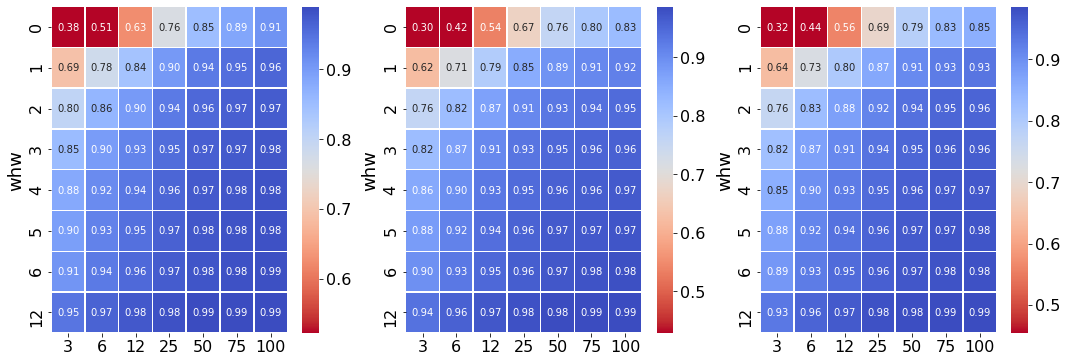

In [85]:
fig= plt.figure(figsize=(18,6))

for i,DoWclass in enumerate(['TtoF','StoM','StoM_7d']):
    ax1 = fig.add_subplot(1,3,i+1)
    #print(i,DoWclass)
    #plt.subplot(1,3,i+1)
    df_ = r2Agg_Avgs_df[DoWclass]
    df_.index.name = 'whw'
    df_=df_.reset_index()
    df_['WinHalfWidth']=df_.index
    ax1 = sns.heatmap(r2Agg_Avgs_df[DoWclass], cmap="coolwarm_r",annot=True,fmt=".2f",linewidths=.5, robust=True)
pd.melt(df_,id_vars=['whw'],value_name='r2Coeffs')

Text(0.85, 0.15, 'hrs')

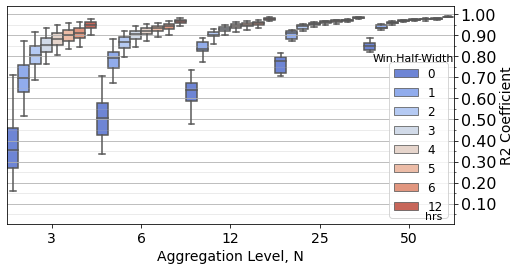

In [86]:
# boxplot R2 values for report figure
customPalette = 'coolwarm'
flierSize = 0
whiskers = [5, 95]
width = 1
xVar = 'N'
yVar = 'r2Coeffs'
hue = 'whw'
figSize = (8, 4)
aggregation_N = [3,6,12,25,50] # for plotting 

#make categorical ais for box plot
xOrder = [str(n) for n in aggregation_N]

fig = plt.figure(figsize=figSize)
axs = fig.add_subplot(111)

s = sns.boxplot(x=xVar, y=yVar, hue=hue, data=r2Agg_df_, whis=whiskers, ax=axs, width=width,
                order=xOrder, boxprops=dict(alpha=1), showmeans=False, \
                fliersize=flierSize, linewidth=None, palette=customPalette)

#sns.stripplot(x=xVar, y=yVar, hue=hue, data=load_df,jitter=True, split=True, linewidth=0.5)
#axs.set_ylim(0,1)  

yGridInterval = 0.1

axs.yaxis.set_major_locator(MultipleLocator(yGridInterval))
axs.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# For the minor ticks, use no labels; default NullFormatter.
axs.yaxis.set_minor_locator(MultipleLocator(yGridInterval / 2))

for item in (axs.get_xticklabels() + axs.get_yticklabels()):
    item.set_fontsize(14)
#axs.tick_params(labeltop=False, labelright=True)
axs.yaxis.set_label_position("right")
axs.yaxis.tick_right()
axs.grid(b=True, which='major', axis='y')
axs.grid(b=True, which='minor', axis='y', alpha=0.3)

#axs.set_title(figTitle, fontsize=14)  # , y=1.0)

axs.set_ylabel("R2 Coefficient", fontsize=14)
axs.set_xlabel("Aggregation Level, N", fontsize=14)

axs.legend(fontsize=12)
fig.text(0.76, 0.70,'Win.Half-Width',fontsize=11, ha='left',va='center')
fig.text(0.85, 0.15,'hrs',fontsize=11, ha='left',va='center')